# Data Study 


Extract the following entities from the dataset 
<ol>
  <li>employerName</li>
  <li>employerAddressStreet_name</li>
  <li>employerAddressCity</li>
  <li>employerAddressState</li>
  <li>employerAddressZip</li>
  <li>einEmployerIdentificationNumber</li>
  <li>employeeName</li>
  <li>ssnOfEmployee</li>
  <li>box1WagesTipsAndOtherCompensations</li>
  <li>box2FederalIncomeTaxWithheld</li>
  <li>box3SocialSecurityWages</li>
  <li>box4SocialSecurityTaxWithheld</li>
  <li>box16StateWagesTips</li>
  <li>box17StateIncomeTax</li>
  <li>taxYear</li>
</ol>

In [264]:
import numpy as np
import pandas as pd
import os

In [265]:
# Load the dataset
train_path = 'dataset/dataset/train'
val_path = 'dataset/dataset/val'

def load_tsv_files(path):
    data = []
    for file in os.listdir(path):
        if file.endswith('.tsv'):
            file_path = os.path.join(path, file)
            df = pd.read_csv(file_path, sep='\t', header=None)
            data.append(df)
    return data

train_data = load_tsv_files(train_path)
val_data = load_tsv_files(val_path)

In [266]:
# Display first few rows of the first file for EDA
train_data[0].head()

,0
0,4734e081-55ff-44b1-97b9-ac818073a487_document-...
1,38acf1e0-e556-4387-8838-8779eb508c8c_document-...
2,38cac7ad-8b09-4d47-a7b0-62d8f409681e_document-...
3,ab756109-1d00-4825-be41-e355ee4a3b2e_document-...
4,09a38de0-1157-4844-9337-38b64cef2275_document-...


In [267]:
# Check for missing values
for df in train_data:
    print(df.isnull().sum())

0    0
dtype: int64


In [268]:
import pandas as pd

# Load the TSV file
file_path = '/home/killdollar/data_task/dataset/dataset/train/boxes_transcripts_labels/0e997ed9-76ba-4124-ac89-38e870352902_document-6_page-1.tsv'
df = pd.read_csv(file_path, sep=',', header=None, names=['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right', 'transcript', 'field'])

# Define the entities to extract
entities = [
    'employerName', 'employerAddressStreet_name', 'employerAddressCity', 'employerAddressState', 'employerAddressZip',
    'einEmployerIdentificationNumber', 'employeeName', 'ssnOfEmployee', 'box1WagesTipsAndOtherCompensations',
    'box2FederalIncomeTaxWithheld', 'box3SocialSecurityWages', 'box4SocialSecurityTaxWithheld', 'box16StateWagesTips',
    'box17StateIncomeTax', 'taxYear'
]

# Extract entities
extracted_entities = {entity: [] for entity in entities}

for _, row in df.iterrows():
    if row['field'] in extracted_entities:
        extracted_entities[row['field']].append(row['transcript'])

# Print the extracted entities
for entity, values in extracted_entities.items():
    print(f"{entity}: {values}")

employerName: ['Smith,', 'Morales', 'and', 'Gates', 'LLC']
employerAddressStreet_name: ['Harrison', 'Mission', '1698']
employerAddressCity: ['West', 'Dennisview']
employerAddressState: ['NY']
employerAddressZip: ['30232', '-7204']
einEmployerIdentificationNumber: ['75-5356392']
employeeName: ['Alexis', 'Sexton']
ssnOfEmployee: ['564-02-8530']
box1WagesTipsAndOtherCompensations: []
box2FederalIncomeTaxWithheld: ['9', '-', '35212']
box3SocialSecurityWages: []
box4SocialSecurityTaxWithheld: []
box16StateWagesTips: []
box17StateIncomeTax: []
taxYear: ['2018']


In [269]:
import pandas as pd

# Load the TSV file
file_path = '/home/killdollar/data_task/dataset/dataset/train/boxes_transcripts_labels/0e997ed9-76ba-4124-ac89-38e870352902_document-6_page-1.tsv'
df = pd.read_csv(file_path, sep=',', header=None, names=['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right', 'transcript', 'field'])

# Define the entities to extract
entities = [
    'employerName', 'employerAddressStreet_name', 'employerAddressCity', 'employerAddressState', 'employerAddressZip',
    'einEmployerIdentificationNumber', 'employeeName', 'ssnOfEmployee', 'box1WagesTipsAndOtherCompensations',
    'box2FederalIncomeTaxWithheld', 'box3SocialSecurityWages', 'box4SocialSecurityTaxWithheld', 'box16StateWagesTips',
    'box17StateIncomeTax', 'taxYear'
]

# Extract entities
extracted_entities = {entity: [] for entity in entities}

for _, row in df.iterrows():
    if row['field'] in extracted_entities:
        extracted_entities[row['field']].append(row['transcript'])

# Combine list elements into single strings
for entity in extracted_entities:
    extracted_entities[entity] = ' '.join(extracted_entities[entity])

# Print the extracted entities
for entity, value in extracted_entities.items():
    print(f"{entity}: {value}")

employerName: Smith, Morales and Gates LLC
employerAddressStreet_name: Harrison Mission 1698
employerAddressCity: West Dennisview
employerAddressState: NY
employerAddressZip: 30232 -7204
einEmployerIdentificationNumber: 75-5356392
employeeName: Alexis Sexton
ssnOfEmployee: 564-02-8530
box1WagesTipsAndOtherCompensations: 
box2FederalIncomeTaxWithheld: 9 - 35212
box3SocialSecurityWages: 
box4SocialSecurityTaxWithheld: 
box16StateWagesTips: 
box17StateIncomeTax: 
taxYear: 2018


In [270]:
import pandas as pd

# Load the TSV file
file_path = '/home/killdollar/data_task/dataset/dataset/train/boxes_transcripts_labels/0e997ed9-76ba-4124-ac89-38e870352902_document-6_page-1.tsv'
df = pd.read_csv(file_path, sep=',', header=None, names=['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right', 'transcript', 'field'])

# Define the entities to extract
entities = [
    'employerName', 'employerAddressStreet_name', 'employerAddressCity', 'employerAddressState', 'employerAddressZip',
    'einEmployerIdentificationNumber', 'employeeName', 'ssnOfEmployee', 'box1WagesTipsAndOtherCompensations',
    'box2FederalIncomeTaxWithheld', 'box3SocialSecurityWages', 'box4SocialSecurityTaxWithheld', 'box16StateWagesTips',
    'box17StateIncomeTax', 'taxYear'
]

# Extract entities
extracted_entities = {entity: [] for entity in entities}

for _, row in df.iterrows():
    if row['field'] in extracted_entities:
        extracted_entities[row['field']].append(row['transcript'])

# Combine list elements into single strings
for entity in extracted_entities:
    extracted_entities[entity] = ' '.join(extracted_entities[entity])

# Print the extracted entities
for entity, value in extracted_entities.items():
    print(f"{entity}: {value}")

employerName: Smith, Morales and Gates LLC
employerAddressStreet_name: Harrison Mission 1698
employerAddressCity: West Dennisview
employerAddressState: NY
employerAddressZip: 30232 -7204
einEmployerIdentificationNumber: 75-5356392
employeeName: Alexis Sexton
ssnOfEmployee: 564-02-8530
box1WagesTipsAndOtherCompensations: 
box2FederalIncomeTaxWithheld: 9 - 35212
box3SocialSecurityWages: 
box4SocialSecurityTaxWithheld: 
box16StateWagesTips: 
box17StateIncomeTax: 
taxYear: 2018


In [271]:
import pandas as pd

train_ids_path = '/home/killdollar/data_task/dataset/dataset/train/train_ids.tsv'
train_ids_df = pd.read_csv(train_ids_path, sep='\t', header=None, names=['file_path'])

# Display the first few rows of the dataframe
train_ids_df.head()

,file_path
0,4734e081-55ff-44b1-97b9-ac818073a487_document-...
1,38acf1e0-e556-4387-8838-8779eb508c8c_document-...
2,38cac7ad-8b09-4d47-a7b0-62d8f409681e_document-...
3,ab756109-1d00-4825-be41-e355ee4a3b2e_document-...
4,09a38de0-1157-4844-9337-38b64cef2275_document-...


### Defining the function to extract the entities needed

In [272]:

# Define the entities to extract
entities = [
    'employerName', 'employerAddressStreet_name', 'employerAddressCity', 'employerAddressState', 'employerAddressZip',
    'einEmployerIdentificationNumber', 'employeeName', 'ssnOfEmployee', 'box1WagesTipsAndOtherCompensations',
    'box2FederalIncomeTaxWithheld', 'box3SocialSecurityWages', 'box4SocialSecurityTaxWithheld', 'box16StateWagesTips',
    'box17StateIncomeTax', 'taxYear'
]

# Base directory for the TSV files
base_dir = '/home/killdollar/data_task/dataset/dataset/train/boxes_transcripts_labels'

# List to store the extracted entities for each file
all_extracted_entities = []

# Iterate over each file path in train_ids.tsv
for file_name in train_ids_df['file_path']:
    full_file_path = os.path.join(base_dir, file_name + '.tsv')
    df = pd.read_csv(full_file_path, sep=',', header=None, names=['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right', 'transcript', 'field'])
    
    # Initialize a dictionary to store the extracted entities for the current file
    extracted_entities = {entity: [] for entity in entities}
    
    # Extract entities from the current file
    for _, row in df.iterrows():
        if row['field'] in extracted_entities:
            extracted_entities[row['field']].append(row['transcript'])
    
    # Combine list elements into single strings for the current file
    for entity in extracted_entities:
        extracted_entities[entity] = ' '.join(extracted_entities[entity])
    
    # Append the extracted entities for the current file to the list
    all_extracted_entities.append(extracted_entities)

# Convert the list of dictionaries to a DataFrame
extracted_entities_df = pd.DataFrame(all_extracted_entities)

In [273]:
# Print the DataFrame
extracted_entities_df.head()

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Dodson-Kennedy and Sons,247 Alexander Islands,South Mauriceland,SC,79991-9264,03-2885751,Krista Conner,626-47-9086,149394 . 79,16030. 73,120690 . 01,9232 . 79,70985 . 58,5149 .29,2019
1,George-Horton and Sons,55527 Shannon Corner,Alisonfort,LA,24369-8354,43-1414035,Rodney Perez,475-90-1539,240614 . 35,79673.63,266460.93,20384.26,120854 .26,8990 . 12,2019
2,Baker-Memeil Led,3250 Brown Pines Apt. 530,Jasonfort,NOT,86498-7130,06-7076127,Kayla Simmons,403-55-9637,183106.34,(2037.04,142194.16,10877.85,94960.51,3010.6,2019
3,"Henry, Jones and Quinn LLC",23927 Kevin Lane Suite 067,New Shannonshire,OR,41335-1879,53-3435873,Juan Mcguire,240-51-9894,101359 . 41,34772. 33,107449 . 4,8219. 88,55120 .4,4003 66,2019
4,Miller PLC Group,174 Briggs Village,West Johnmouth,NJ,95552-9854,77-6878997,Amanda Hoffman,317-37-6322,107565. 11,36048.57,78648.9,6016 64,56829. 43,3360.53,2019


In [274]:
extracted_entities_df.isnull().sum()

employerName                          0
employerAddressStreet_name            0
employerAddressCity                   0
employerAddressState                  0
employerAddressZip                    0
einEmployerIdentificationNumber       0
employeeName                          0
ssnOfEmployee                         0
box1WagesTipsAndOtherCompensations    0
box2FederalIncomeTaxWithheld          0
box3SocialSecurityWages               0
box4SocialSecurityTaxWithheld         0
box16StateWagesTips                   0
box17StateIncomeTax                   0
taxYear                               0
dtype: int64

- There are some Null values but there are always space with ' '

In [275]:
extracted_entities_df.shape ## 600 client details extracted

(600, 15)

In [276]:
##check if duplicated
extracted_entities_df.duplicated().sum()

np.int64(29)

In [277]:
# Save the extracted entities DataFrame to a CSV file
extracted_entities_df.to_csv('extracted_entities_train.csv', index=False)   

In [278]:
extracted_entities_df.info()    ##info non null count is there becuase it is filled with empty string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   employerName                        600 non-null    object
 1   employerAddressStreet_name          600 non-null    object
 2   employerAddressCity                 600 non-null    object
 3   employerAddressState                600 non-null    object
 4   employerAddressZip                  600 non-null    object
 5   einEmployerIdentificationNumber     600 non-null    object
 6   employeeName                        600 non-null    object
 7   ssnOfEmployee                       600 non-null    object
 8   box1WagesTipsAndOtherCompensations  600 non-null    object
 9   box2FederalIncomeTaxWithheld        600 non-null    object
 10  box3SocialSecurityWages             600 non-null    object
 11  box4SocialSecurityTaxWithheld       600 non-null    object

In [279]:
##check for empty string
extracted_entities_df[extracted_entities_df == ''].count()

employerName                           40
employerAddressStreet_name             32
employerAddressCity                    38
employerAddressState                   48
employerAddressZip                     40
einEmployerIdentificationNumber        59
employeeName                           35
ssnOfEmployee                         134
box1WagesTipsAndOtherCompensations     81
box2FederalIncomeTaxWithheld           81
box3SocialSecurityWages                89
box4SocialSecurityTaxWithheld          96
box16StateWagesTips                    91
box17StateIncomeTax                    81
taxYear                                55
dtype: int64

In [280]:
## now filling those empty string with nan
extracted_entities_df = extracted_entities_df.replace('', np.nan)

In [281]:
## now seeing the null values
extracted_entities_df.isnull().sum()

employerName                           40
employerAddressStreet_name             32
employerAddressCity                    38
employerAddressState                   48
employerAddressZip                     40
einEmployerIdentificationNumber        59
employeeName                           35
ssnOfEmployee                         134
box1WagesTipsAndOtherCompensations     81
box2FederalIncomeTaxWithheld           81
box3SocialSecurityWages                89
box4SocialSecurityTaxWithheld          96
box16StateWagesTips                    91
box17StateIncomeTax                    81
taxYear                                55
dtype: int64

- Now we have to handle those missing values

In [282]:
extracted_entities_df.describe()

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
count,560,568,562,552,560,541,565,466,519,519,511,504,509,519,545
unique,476,487,470,67,467,460,482,354,488,493,481,481,486,495,4
top,Bennett and Sons Group,427 Burton Burgs,Johnberg,CA,84969-1857,26-9963170,Edward Valdez,0,109302 . 09,8877 . 69,185135.81,10545.75,70561 . 63,3317.57,2018
freq,3,3,3,18,3,3,2,73,2,2,2,2,2,2,396


#### Starting with first column 'EmployerName'

In [283]:
extracted_entities_df['employerName'].value_counts()

employerName
Bennett and Sons Group                   3
Hawkins Inc Ltd                          3
Brown-Dunn LLC                           3
Smith, Winters and Hernandez and Sons    3
Casey, Terry and Bradley Ltd             2
                                        ..
Roberson-Little PLC                      1
Payne PLC LLC                            1
Rivera, Martinez and Hunter and Sons     1
Montgomery-Taylor LLC                    1
Floyd, Bell and Greene Group             1
Name: count, Length: 476, dtype: int64

In [284]:
extracted_entities_df['employerName'].unique()

array(['Dodson-Kennedy and Sons', 'George-Horton and Sons',
       'Baker-Memeil Led', 'Henry, Jones and Quinn LLC',
       'Miller PLC Group', 'Diaz and Sons Ltd',
       'Hardy, Larson and Washington LLC',
       'Ford, Sanders and Lawrence Ltd', 'Gray and Sons Inc',
       'Steven Thompson', 'Mendoza-Martin Group', 'Walker Group and Sons',
       'Hobbs Ltd Ltd', 'Scott PLC Ltd', 'Buyah-Moody Ine',
       'Harrison-King LLC', 'Griffith PLC Ltd', 'Johnson-Lucas Group',
       'Allen-Davis LLC', 'Mendoza-Ruiz Inc', 'Fields-Pacheco and Sons',
       'Mcconnell-Whitaker and Sons', 'Bryant Ltd and Sons',
       'Flores, Rich and Jones PLC', 'Harris Group Ltd',
       'Duran Inc Group', 'Curry, Sanchez and Acevedo Inc',
       'Whitehead Ltd and Sons', 'and Sons', 'Sosa PLC Group',
       'Heath-Taylor Ltd', 'Ward LLC and Sons', 'Frank and Sons PLC',
       'Cook, Bailey and Osborne LLC', 'Schultz-Harris and Sons', nan,
       'Gamble, Rodriguez and Blair Ltd', 'Hughes-Fields LLC',
      

In [285]:
extracted_entities_df['employerName'].isnull().sum()

np.int64(40)

In [286]:
extracted_entities_df[extracted_entities_df['employerName'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
35,NaN,164 Turner Burg Suite 514,East Sean,MN,59199-4858,26-8364506,Decker and Sons PLC,348-60-0732,53923. 35,8573 . 3,41870 . 61,3203.1,25122 . 18,1882.77,2019
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
106,NaN,NaN,NaN,NaN,NaN,NaN,Burtia sey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
115,NaN,lis Willey age. 819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [287]:
# Delete rows where 'employerName' is null but keep those which have an address
extracted_entities_df = extracted_entities_df[~extracted_entities_df['employerName'].isnull() | 
                                              (~extracted_entities_df['employerAddressStreet_name'].isnull() & 
                                               ~extracted_entities_df['employerAddressCity'].isnull() & 
                                               ~extracted_entities_df['employerAddressState'].isnull() & 
                                               ~extracted_entities_df['employerAddressZip'].isnull())]

In [288]:
extracted_entities_df[extracted_entities_df['employerName'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
35,NaN,164 Turner Burg Suite 514,East Sean,MN,59199-4858,26-8364506,Decker and Sons PLC,348-60-0732,53923. 35,8573 . 3,41870 . 61,3203.1,25122 . 18,1882.77,2019
358,NaN,5054 Andrew Mills Suite 527,Meet Jonathanshire,MY,93265-7717,32-9156434,Whitney Dickson,299-20-2304,112540.72,15122.77,414913.13,8790.85,52921.02,1834.89,2018
396,NaN,$406 Tran Club Quite 832,Feltbrille,V,17912-1873,NaN,DE. Laura,NaN,NaN,NaN,104945.09,14149.03,NaN,(979.39,2018
463,NaN,11510 Patricia Rest,Fieldshaven,AZ,02906-3853,51-9104110,John Kelly,556-01-9925,NaN,NaN,. 49143 87,NaN,NaN,NaN,2018
476,NaN,2676 William Mountain,Danielsfort,MN,31233-5510,25-0180103,Kimberly Villanueva,num-43-4102,41345. 53,10537 .,NaN,NaN,tips. 46 51,. 1483 14,2018
483,NaN,$898 Robles Estates,Test Donna,MS,03853-8053,NaN,Timothy Green,581-54-3835,NaN,NaN,26245Curity,NaN,115716 . 2,NaN,2018
494,NaN,35657 James Courts,West Jasmine,NM,04093-1257,68-7884298,Sara Dean,708-85-6052,62278.33,NaN,NaN,NaN,"tips. 96, 64",- 2832 39,2018
496,NaN,26427 Harper River Suite 482,forth Garystad,OH,93378-3048,75-9757299,Colleen Morales,numbed-3230,64561. 45,10105 . 38,NaN,NaN,6 33292 .,1755 - 58,2018
498,NaN,089 Hunter Ford Suite 170,Townsendtown,NY,29893-4846,84-1097895,Alex Warren,NaN,105770.3,NaN,NaN,NaN,"tips. us , 95",4300.24,2018


- Now we will look into the four columns for the address of the Employer(employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip)

In [289]:
extracted_entities_df['employerAddressStreet_name'].value_counts()

employerAddressStreet_name
427 Burton Burgs                  3
28857 Edward Ferry Apt. 226       3
866 Wilson Fall Suite 425         2
2762 Blair Ramp                   2
32444 Delacruz Locks              2
                                 ..
83244 Gary Ways Apt. 177          1
1087 Ashley Flats Apt. 892        1
706 Matthew Greens                1
3339 Emily Trace Suite 390        1
673 Navarro Parkways Suite 318    1
Name: count, Length: 483, dtype: int64

In [290]:
extracted_entities_df['employerAddressStreet_name'].isnull().sum()

np.int64(5)

In [291]:
## rows with employerAdressstreetname null value
extracted_entities_df[extracted_entities_df['employerAddressStreet_name'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
113,Timetay Bryant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
160,Manbey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
169,"salas, Bergera and Levis Group",NaN,Kristinburgh,FL,16432-,NaN,Robin Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
330,"Carter, Lucero and Davis PLC",NaN,Brownborough,VT,34455-6450,76-0796293,Christopher Love,352-77-4276,69050 . 02,7493 . 91,69773.9,5337.7,33840 . 47,2385 25,2018
361,Jones PLC LLC,NaN,Hortonstad,OK,99476-2797,44-1608409,Shane Burch,278-69-7877,248046. 96,. 36844 57,318641 43 .,24376 . 07,126574. 85,5953 . 42,2018


In [292]:
# Define the employer names to drop
employers_to_drop = ['Timetay Bryant', 'Manbey', 'salas, Bergera and Levis Group']

# Drop the rows where employerName is in the list
extracted_entities_df = extracted_entities_df[~extracted_entities_df['employerName'].isin(employers_to_drop)]

# Display the updated dataframe
extracted_entities_df.head()

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Dodson-Kennedy and Sons,247 Alexander Islands,South Mauriceland,SC,79991-9264,03-2885751,Krista Conner,626-47-9086,149394 . 79,16030. 73,120690 . 01,9232 . 79,70985 . 58,5149 .29,2019
1,George-Horton and Sons,55527 Shannon Corner,Alisonfort,LA,24369-8354,43-1414035,Rodney Perez,475-90-1539,240614 . 35,79673.63,266460.93,20384.26,120854 .26,8990 . 12,2019
2,Baker-Memeil Led,3250 Brown Pines Apt. 530,Jasonfort,NOT,86498-7130,06-7076127,Kayla Simmons,403-55-9637,183106.34,(2037.04,142194.16,10877.85,94960.51,3010.6,2019
3,"Henry, Jones and Quinn LLC",23927 Kevin Lane Suite 067,New Shannonshire,OR,41335-1879,53-3435873,Juan Mcguire,240-51-9894,101359 . 41,34772. 33,107449 . 4,8219. 88,55120 .4,4003 66,2019
4,Miller PLC Group,174 Briggs Village,West Johnmouth,NJ,95552-9854,77-6878997,Amanda Hoffman,317-37-6322,107565. 11,36048.57,78648.9,6016 64,56829. 43,3360.53,2019


In [293]:
## rows with employerAdressstreetname null value
extracted_entities_df[extracted_entities_df['employerAddressStreet_name'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
330,"Carter, Lucero and Davis PLC",NaN,Brownborough,VT,34455-6450,76-0796293,Christopher Love,352-77-4276,69050 . 02,7493 . 91,69773.9,5337.7,33840 . 47,2385 25,2018
361,Jones PLC LLC,NaN,Hortonstad,OK,99476-2797,44-1608409,Shane Burch,278-69-7877,248046. 96,. 36844 57,318641 43 .,24376 . 07,126574. 85,5953 . 42,2018


In [294]:
extracted_entities_df.isnull().sum()

employerName                            9
employerAddressStreet_name              2
employerAddressCity                     5
employerAddressState                   15
employerAddressZip                      8
einEmployerIdentificationNumber        25
employeeName                            5
ssnOfEmployee                         100
box1WagesTipsAndOtherCompensations     47
box2FederalIncomeTaxWithheld           47
box3SocialSecurityWages                55
box4SocialSecurityTaxWithheld          62
box16StateWagesTips                    57
box17StateIncomeTax                    47
taxYear                                55
dtype: int64

In [295]:
extracted_entities_df['employerAddressCity'].value_counts()

employerAddressCity
Lake Joshua        3
Johnberg           3
Lake Cynthia       3
Hortonstad         2
East Michael       2
                  ..
South Allenside    1
Lake Anthear       1
Tonyaberg          1
Angelaton          1
West Tonyashire    1
Name: count, Length: 469, dtype: int64

In [296]:
extracted_entities_df['employerAddressState'].value_counts()

employerAddressState
CA    18
WY    18
VA    17
NV    16
IL    16
      ..
:      1
10     1
RE     1
MY     1
wy     1
Name: count, Length: 67, dtype: int64

In [297]:

extracted_entities_df['employerAddressZip'].value_counts()

employerAddressZip
84969-1857    3
77170-2706    2
56526-3457    2
05110-3687    2
65429-3555    2
             ..
06179-5945    1
42158-3720    1
27738-3051    1
90311-4687    1
07679-0916    1
Name: count, Length: 465, dtype: int64

In [298]:
## again checking for null values
extracted_entities_df.isnull().sum()

employerName                            9
employerAddressStreet_name              2
employerAddressCity                     5
employerAddressState                   15
employerAddressZip                      8
einEmployerIdentificationNumber        25
employeeName                            5
ssnOfEmployee                         100
box1WagesTipsAndOtherCompensations     47
box2FederalIncomeTaxWithheld           47
box3SocialSecurityWages                55
box4SocialSecurityTaxWithheld          62
box16StateWagesTips                    57
box17StateIncomeTax                    47
taxYear                                55
dtype: int64

In [299]:
# Fill missing values in the specified columns with 'Unknown'
columns_to_fill = ['employerAddressStreet_name', 'employerAddressCity', 'employerAddressState', 'employerAddressZip']
extracted_entities_df[columns_to_fill] = extracted_entities_df[columns_to_fill].fillna('Unknown')

# Verify the changes
extracted_entities_df[columns_to_fill].isnull().sum()

employerAddressStreet_name    0
employerAddressCity           0
employerAddressState          0
employerAddressZip            0
dtype: int64

In [300]:
## also make the employerName unknown where null
extracted_entities_df['employerName'] = extracted_entities_df['employerName'].fillna('Unknown')

In [301]:
extracted_entities_df.isnull().sum()

employerName                            0
employerAddressStreet_name              0
employerAddressCity                     0
employerAddressState                    0
employerAddressZip                      0
einEmployerIdentificationNumber        25
employeeName                            5
ssnOfEmployee                         100
box1WagesTipsAndOtherCompensations     47
box2FederalIncomeTaxWithheld           47
box3SocialSecurityWages                55
box4SocialSecurityTaxWithheld          62
box16StateWagesTips                    57
box17StateIncomeTax                    47
taxYear                                55
dtype: int64

- Now we have cleaned the data for our NER model for the columns employeeName,employerAddressStreet_name,employerAddressCity,employerAddressState ,employerAddressZip    

- Now we will move to our new column 'einEmployerIdentificationNumber'

In [302]:
## seeing the unique values of einEmployerIdentificationNumber
extracted_entities_df['einEmployerIdentificationNumber'].unique()

array(['03-2885751', '43-1414035', '06-7076127', '53-3435873',
       '77-6878997', '54-8640873', '34-5282093', '72-7975122',
       '27-4314855', nan, '27-6591270', '34-2378159', '05-3897143',
       '99-2710525', '50-0626121', '27-0420737', '41-7771215',
       '184-33-868', '73-0620933', '45-4647132', '36-4807362',
       '16-8543273', '16-5367778', '45-1687371', '01-1527003',
       '66-7506198', '26-7423123', '44-6375438', 'Flores-Robinson',
       '23-7862151', '74-1339134', '84-0030604', '25-4987079',
       '10-8875958', '47-9456324', '26-8364506', '83-4827756',
       '80-1359580', '94-4130330', '98-0715720', '04-4091485',
       '34-0417697', '10-4796415', '87-4907955', '23-2105958',
       '76-4920923', '63-7847782', '45-4918349', '37-8013701',
       '71-4914665', '88-9566199', '75-6263820', '43-4391249',
       '58-2554877', '30-5758869', '25-4917998', '52-2836465',
       '45-8902038', '21-7745308', '26-9819949', '95-7356736',
       '92-8446496', '31-8637274', '20-576504

In [303]:
## null values of einEmployerIdentificationNumber
extracted_entities_df['einEmployerIdentificationNumber'].isnull().sum()

np.int64(25)

In [304]:
## the rows with null values of einEmployerIdentificationNumber
extracted_entities_df[extracted_entities_df['einEmployerIdentificationNumber'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
9,Steven Thompson,3176 Jonathan Oval,West Jeffreyberg,MN,15743-9552,NaN,80-1366099,595-45-6525,201325. 11,. 21647 49,NaN,17671 57,104055 99,9745 69,2019
46,French 104 and See,22463 moreno Stream,Victoriabury,FA,90146-9103,NaN,Katie Hensley,$35-36-3912,49239.09,10471-76,NaN,1012.09,39034.35,2306.07,2019
86,62-7492385,2762 Blair Ramp,Mathewsville,MT,73701-7055,NaN,Miller James,813-07-9495,150047 . 64,29336.88,144555 . 81,11058 .52,74994 . 88,1959 . 47,2019
114,Richardson LLC Inc,951 Jonathon Underpass,West Davidfort,IN,14837-2735,NaN,Matthew Manning,242-39-6533,139507.77,24453-32,149344.52,13424.86,NaN,4630.34,2018
116,"Dudley, Elliott and Miranda and Sons",114 Allison Pike Apt. 591,New Mistyburgh,VA,41995-9955,NaN,James Cooper,298-44-6815,82441 .12,NaN,101276.39,7747 .64,45122 15,. 2284 63,2018
142,"Terry, Brown and Clark Led",7463 Brent Green,Carterport,MA,25746-0106,NaN,stacie Bruce,NaN,236316.14,96159.02,196389.15,NaN,4 tiphilly,3134.07,2018
157,Reed Group Group,por Jones Fall,Brad,MA,49272 -0415,NaN,Michelle Cannon,307-70-421,41686.29,NaN,NaN,NaN,22398 .54,NaN,2018
162,Campbell Inc LLC,8854 Tanya Ways,Heatherside,MT,90791-7419,NaN,william Frye,515-94-500,77120.93,22335 . 46,97931 37,7491.75,tips. 89 7,3718 .39,2018
164,Ortega-Hayden and,$540 Beat Spring Apt. 471,Laurafurt,IN,40913-5681,NaN,Candice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
166,Garcia and Sons Grow,929 Chapman Talands,Unknown,Unknown,Unknown,NaN,Faaneta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [305]:
# Impute missing einEmployerIdentificationNumber with a placeholder
extracted_entities_df['einEmployerIdentificationNumber'].fillna('UNKNOWN_EIN', inplace=True)

/tmp/ipykernel_17980/318607838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  extracted_entities_df['einEmployerIdentificationNumber'].fillna('UNKNOWN_EIN', inplace=True)


In [306]:
extracted_entities_df

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Dodson-Kennedy and Sons,247 Alexander Islands,South Mauriceland,SC,79991-9264,03-2885751,Krista Conner,626-47-9086,149394 . 79,16030. 73,120690 . 01,9232 . 79,70985 . 58,5149 .29,2019
1,George-Horton and Sons,55527 Shannon Corner,Alisonfort,LA,24369-8354,43-1414035,Rodney Perez,475-90-1539,240614 . 35,79673.63,266460.93,20384.26,120854 .26,8990 . 12,2019
2,Baker-Memeil Led,3250 Brown Pines Apt. 530,Jasonfort,NOT,86498-7130,06-7076127,Kayla Simmons,403-55-9637,183106.34,(2037.04,142194.16,10877.85,94960.51,3010.6,2019
3,"Henry, Jones and Quinn LLC",23927 Kevin Lane Suite 067,New Shannonshire,OR,41335-1879,53-3435873,Juan Mcguire,240-51-9894,101359 . 41,34772. 33,107449 . 4,8219. 88,55120 .4,4003 66,2019
4,Miller PLC Group,174 Briggs Village,West Johnmouth,NJ,95552-9854,77-6878997,Amanda Hoffman,317-37-6322,107565. 11,36048.57,78648.9,6016 64,56829. 43,3360.53,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Walker-Howard Inc,5530 Cohen Lodge,Davisview,CA,82937-5566,13-2722851,Jacob Skinner,112-74-4692,48791 . 84,16579 .87,17063 . 08,3600 . 33,26168. 1,2616.16,2018
596,Morales-Young Group,063 Jones Dam Suite 031,Coxport,VA,92083-9497,UNKNOWN_EIN,Michael Gonzalez,429-46-5266,193143 .8,49242 . 6,235289.85,17999 . 67,92498 . 81,3130 . 16,2018
597,"Rodriguez, Mitchell and Rodgers and Son",24284 Zachary Brook Suite 023,Brendaville,OR,12462-8099,02-096016,Briana Montgomery,131-44-3499,102053 . 8,12066.96,91557 . 44,7004 . 14,49100 . 25,3242 . 14,2018
598,Hawkins Inc Ltd,00193 Aimee Garden,Griffinbury,CA,00534-4134,58-3835382,April Brown,335-36-7976,198607 38,24593 . 28,147079.3,11251 57,96875 . 19,4096.83,2018


In [307]:
## the rows with null values of einEmployerIdentificationNumber
extracted_entities_df.isnull().sum()

employerName                            0
employerAddressStreet_name              0
employerAddressCity                     0
employerAddressState                    0
employerAddressZip                      0
einEmployerIdentificationNumber         0
employeeName                            5
ssnOfEmployee                         100
box1WagesTipsAndOtherCompensations     47
box2FederalIncomeTaxWithheld           47
box3SocialSecurityWages                55
box4SocialSecurityTaxWithheld          62
box16StateWagesTips                    57
box17StateIncomeTax                    47
taxYear                                55
dtype: int64

In [308]:
## doing same we will set unknow to employeeName which are null
extracted_entities_df['employeeName'] = extracted_entities_df['employeeName'].fillna('Unknown')

In [309]:
extracted_entities_df.isnull().sum()

employerName                            0
employerAddressStreet_name              0
employerAddressCity                     0
employerAddressState                    0
employerAddressZip                      0
einEmployerIdentificationNumber         0
employeeName                            0
ssnOfEmployee                         100
box1WagesTipsAndOtherCompensations     47
box2FederalIncomeTaxWithheld           47
box3SocialSecurityWages                55
box4SocialSecurityTaxWithheld          62
box16StateWagesTips                    57
box17StateIncomeTax                    47
taxYear                                55
dtype: int64

- Now We will do the column 'ssnOfEmployee'

In [310]:
## checking for ssnOfEmployee
extracted_entities_df['ssnOfEmployee'].unique()

array(['626-47-9086', '475-90-1539', '403-55-9637', '240-51-9894',
       '317-37-6322', '227-22-3523', '469-79-2403', '117-65-3078',
       '155-62-1637', '595-45-6525', '276-57-6944', '197-71-1499',
       '616-42-0119', '051-70-0598', '846-62-1414', '331-13-8982',
       '050-77-5869', '331-23-0733', '755-95-3280', '806-48-9778',
       '207-09-8027', '178-86-9660', '753-52-7353', '008-33-5675',
       '143-32-6653', '870-96-4337', '463-41-8439', '079-98-8087',
       '380-62-5767', '767-92-4559', '030-71-4252', '633-66-8979',
       '850-30-3411', '325-64-9593', '140-57-9055', '348-60-0732',
       '105-78-0260', '560-52-7390', '(07-42-9804', '045-87-7812',
       '311-89-7688', '059-53-8595', '252-57-6299', '467-23-4754',
       '210-97-3143', '019-62-3340', '$35-36-3912', '751-60-9547',
       '725-96-4934', '741-51-3041', '840-98-5933', '437-56-6585',
       '426-54-3183', '809-21-4576', '269-49-2779', '550-60-6655',
       '659-29-4275', '497-78-5154', '370-06-1290', '875-36-46

In [311]:
extracted_entities_df['ssnOfEmployee'].value_counts()

ssnOfEmployee
0                  73
751-60-9547         2
725-96-4934         2
426-54-3183         2
497-78-5154         2
                   ..
654-43-4102         1
- 800 - 04 7226     1
453-01-2098         1
339-21-8499         1
300-49-562          1
Name: count, Length: 354, dtype: int64

- There are some pattern mismatch in social security number of the employee. we will be using regex for that to filter that and in place of placeholder we will be having none

- The regex pattern r`\b\d{3}-\d{2}-\d{4}\b` matches SSNs in the XXX-XX-XXXX format.
The \b word boundary ensures that the pattern matches whole SSNs and not parts of other strings.

In [312]:
import re 

# Define a function to clean and standardize SSNs
def clean_ssn(ssn):
    # Ensure the input is a string
    if not isinstance(ssn, str):
        return '000-00-0000'
    
    # Define regex pattern for valid SSN
    ssn_pattern = re.compile(r'\b\d{3}-\d{2}-\d{4}\b')
    
    # Search for SSN pattern in the text
    match = ssn_pattern.search(ssn)
    
    if match:
        return match.group(0)
    else:
        # Handle invalid SSNs (e.g., return a placeholder)
        return '000-00-0000'

In [313]:
extracted_entities_df['ssnOfEmployee'] = extracted_entities_df['ssnOfEmployee'].apply(clean_ssn)

In [314]:
## cheking null values again
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations    47
box2FederalIncomeTaxWithheld          47
box3SocialSecurityWages               55
box4SocialSecurityTaxWithheld         62
box16StateWagesTips                   57
box17StateIncomeTax                   47
taxYear                               55
dtype: int64

- Our Next column is box1WagesTipsAndOtherCompensations

In [315]:
## null values of box1WagesTipsAndOtherCompensations
extracted_entities_df['box1WagesTipsAndOtherCompensations'].isnull().sum()

np.int64(47)

In [316]:
## rows with null values of box1WagesTipsAndOtherCompensations
extracted_entities_df[extracted_entities_df['box1WagesTipsAndOtherCompensations'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
100,"Gray, Hernandez and Bradshaw and Sons",021 Clayton Springs Suite 653,Ryanmouth,Unknown,54833-9807,92-8459614,Kurt Krueger,664-08-7686,NaN,. 53 13295,106398 .05,8139 .45,47120 .79,6063 .72,2018
103,Lee-Phillips and Sons,3086 Jennifer Lakes Apt. 032,Silvaport,MD,21737-9247,93-8027739,Carlos Miller,233-88-5197,NaN,12202 99,47455.25,3630.33,. $4907,. 3391 74,2018
104,Lewis-Bell Group,13203 Robert Pines,East Williamhaven,WV,15930-8821,60-5598124,Lisa Wells,234-25-5539,NaN,NaN,193137 .53,14775.02,71082 . 42,. 7345 02,2018
105,"Smith, Rose and French Itd",0377 David Shoal,North Anthonychester,NH,96961-6876,53-9494262,Justin Gonzalez,612-24-8196,NaN,9981 38,41698 .6,3189.94,26838 .4,2527 .01,2018
110,"Weaver , Reyes and Barnett LLC",05125 Snow Isle,South Deborahfurt,NH,28864-6919,30-0915668,Michael Brown,758-31-8946,NaN,10371 . 99,50639.22,3873.9,23916.83,1801 .2,2018
112,Castillo-Schroeder PLC,151 Thomas Ville Apt. 019,West Isaiahmouth,Mo,40729-7558,95-0812195,Erica Lee,725-28-8485,NaN,NaN,41868.71,3202 .96,25909.23,845.36,2018
118,Johnson Inc Group,90404 Anita Club Suite 751,Guerreroville,PA,14463-7391,93-9684825,aron Kennedy,000-00-0000,NaN,12233.56,NaN,7689. 93,49309.57,3808.35-,2018
120,"Mcdaniel, Wood",88524 Sandra Ferry,Aprilhaven,VT,61714-2674,13-2131329,Thomas Robinson,444-72-5153,NaN,NaN,25931-57,NaN,citing,4132.54,2018
121,Terry Group Inc,207 Lisa Underpass Suite 644,Port Kendra,CO,64443-3719,57-4496004,Kimberly Meyer,458-59-1504,NaN,NaN,NaN,NaN,36972.4,2925.99,2018
124,"Bradshaw, Richards and Dalton PLC",584 Jones Throughway,East Shelbyfort,VT,75319-9486,65-7930490,Eric Hernandez,453-01-2098,NaN,36106.47,NaN,10563.28,. 59328 91,5932 .34,2018


In [317]:
## replace all null value with 0
extracted_entities_df['box1WagesTipsAndOtherCompensations'] = extracted_entities_df['box1WagesTipsAndOtherCompensations'].fillna(0)

In [318]:
extracted_entities_df['box1WagesTipsAndOtherCompensations'].isnull().sum()

np.int64(0)

In [319]:
## unique values of box1WagesTipsAndOtherCompensations
extracted_entities_df['box1WagesTipsAndOtherCompensations'].unique()

array(['149394 . 79', '240614 . 35', '183106.34', '101359 . 41',
       '107565. 11', '147496 . 92', '146910.41', '173418 31',
       '239921 . 72', '201325. 11', '207898.7', '62511 95', '61850 .9',
       '229346 . 09', '80716.7', '127623. 85', '145584 . 79',
       '. 140632 91', '56418.54', '211698. 37', '132590 .9', '167506 94',
       '182644 . 07', '145710 .2', '177355 . 09', '205438 .26',
       '92974 . 4', '133855. 27', '80470 . 88', '102029.2', '91590. 23',
       '224464 . 93', '42469. 96', '108293.29', '226872.04', '53923. 35',
       '84232 . 68', '180688.53', '180558.05', '249641 . 71', '128754.19',
       '86811 . 49', '194865 . 62', '48186.52', '75423 . 94',
       '237815. 51', '49239.09', '161516.46', '182649. 73', '248637.54',
       '144945 . 07', '211162 . 56', '141176.79', '234070.02',
       '142841 . 18', '69896 01', '232471 05', '212792 . 18', '246482.31',
       '238724.37', '84406 .54', '59814.81', '86024 94', '239228 . 88',
       '203417 02', '227755 . 88',

In [320]:
# Define a function to clean and standardize the values
def clean_wages_tips(value):
    if not isinstance(value, str):
        return value
    # Remove non-numeric characters except for the decimal point
    value = re.sub(r'[^\d.]', '', value)
    # Fix misplaced decimal points
    parts = value.split('.')
    if len(parts) > 2:
        value = parts[0] + '.' + ''.join(parts[1:])
    return value


In [321]:
# Apply the cleaning function to the column
extracted_entities_df['box1WagesTipsAndOtherCompensations'] = extracted_entities_df['box1WagesTipsAndOtherCompensations'].apply(clean_wages_tips)

In [322]:
extracted_entities_df['box1WagesTipsAndOtherCompensations'].unique()

array(['149394.79', '240614.35', '183106.34', '101359.41', '107565.11',
       '147496.92', '146910.41', '17341831', '239921.72', '201325.11',
       '207898.7', '6251195', '61850.9', '229346.09', '80716.7',
       '127623.85', '145584.79', '.14063291', '56418.54', '211698.37',
       '132590.9', '16750694', '182644.07', '145710.2', '177355.09',
       '205438.26', '92974.4', '133855.27', '80470.88', '102029.2',
       '91590.23', '224464.93', '42469.96', '108293.29', '226872.04',
       '53923.35', '84232.68', '180688.53', '180558.05', '249641.71',
       '128754.19', '86811.49', '194865.62', '48186.52', '75423.94',
       '237815.51', '49239.09', '161516.46', '182649.73', '248637.54',
       '144945.07', '211162.56', '141176.79', '234070.02', '142841.18',
       '6989601', '23247105', '212792.18', '246482.31', '238724.37',
       '84406.54', '59814.81', '8602494', '239228.88', '20341702',
       '227755.88', '58709.15', '102901.12', '190226.6', '7872169',
       '129999.8', '5756968'

In [323]:
## show me rows with 0 value
extracted_entities_df[extracted_entities_df['box1WagesTipsAndOtherCompensations'] == 0]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
100,"Gray, Hernandez and Bradshaw and Sons",021 Clayton Springs Suite 653,Ryanmouth,Unknown,54833-9807,92-8459614,Kurt Krueger,664-08-7686,0,. 53 13295,106398 .05,8139 .45,47120 .79,6063 .72,2018
103,Lee-Phillips and Sons,3086 Jennifer Lakes Apt. 032,Silvaport,MD,21737-9247,93-8027739,Carlos Miller,233-88-5197,0,12202 99,47455.25,3630.33,. $4907,. 3391 74,2018
104,Lewis-Bell Group,13203 Robert Pines,East Williamhaven,WV,15930-8821,60-5598124,Lisa Wells,234-25-5539,0,NaN,193137 .53,14775.02,71082 . 42,. 7345 02,2018
105,"Smith, Rose and French Itd",0377 David Shoal,North Anthonychester,NH,96961-6876,53-9494262,Justin Gonzalez,612-24-8196,0,9981 38,41698 .6,3189.94,26838 .4,2527 .01,2018
110,"Weaver , Reyes and Barnett LLC",05125 Snow Isle,South Deborahfurt,NH,28864-6919,30-0915668,Michael Brown,758-31-8946,0,10371 . 99,50639.22,3873.9,23916.83,1801 .2,2018
112,Castillo-Schroeder PLC,151 Thomas Ville Apt. 019,West Isaiahmouth,Mo,40729-7558,95-0812195,Erica Lee,725-28-8485,0,NaN,41868.71,3202 .96,25909.23,845.36,2018
118,Johnson Inc Group,90404 Anita Club Suite 751,Guerreroville,PA,14463-7391,93-9684825,aron Kennedy,000-00-0000,0,12233.56,NaN,7689. 93,49309.57,3808.35-,2018
120,"Mcdaniel, Wood",88524 Sandra Ferry,Aprilhaven,VT,61714-2674,13-2131329,Thomas Robinson,444-72-5153,0,NaN,25931-57,NaN,citing,4132.54,2018
121,Terry Group Inc,207 Lisa Underpass Suite 644,Port Kendra,CO,64443-3719,57-4496004,Kimberly Meyer,458-59-1504,0,NaN,NaN,NaN,36972.4,2925.99,2018
124,"Bradshaw, Richards and Dalton PLC",584 Jones Throughway,East Shelbyfort,VT,75319-9486,65-7930490,Eric Hernandez,453-01-2098,0,36106.47,NaN,10563.28,. 59328 91,5932 .34,2018


In [324]:
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations     0
box2FederalIncomeTaxWithheld          47
box3SocialSecurityWages               55
box4SocialSecurityTaxWithheld         62
box16StateWagesTips                   57
box17StateIncomeTax                   47
taxYear                               55
dtype: int64

- Next we will go for the column 'box2FederalIncomeTaxWithheld'

In [325]:
## null values of box2FederalIncomeTaxWithheld
extracted_entities_df['box2FederalIncomeTaxWithheld'].isnull().sum()

np.int64(47)

In [326]:
## rows with null values of box2FederalIncomeTaxWithheld
extracted_entities_df[extracted_entities_df['box2FederalIncomeTaxWithheld'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
104,Lewis-Bell Group,13203 Robert Pines,East Williamhaven,WV,15930-8821,60-5598124,Lisa Wells,234-25-5539,0,NaN,193137 .53,14775.02,71082 . 42,. 7345 02,2018
112,Castillo-Schroeder PLC,151 Thomas Ville Apt. 019,West Isaiahmouth,Mo,40729-7558,95-0812195,Erica Lee,725-28-8485,0,NaN,41868.71,3202 .96,25909.23,845.36,2018
116,"Dudley, Elliott and Miranda and Sons",114 Allison Pike Apt. 591,New Mistyburgh,VA,41995-9955,UNKNOWN_EIN,James Cooper,298-44-6815,82441.12,NaN,101276.39,7747 .64,45122 15,. 2284 63,2018
117,LLC Gardner-Anderson,757 Cassidy Garden,East Davidfort,KY,45062-0904,87-0100147,Bruce Jones,207-66-8919,.4298562,NaN,42332 .19,3238.41,. 21589 72,1285.9,2018
119,Johnston LLC Itd,9788 william Lodge,Chandlerfurt,NV,31006-1793,35-3517049,Francisco Thornton,000-00-0000,76127.,NaN,64222.03,4912.99,NaN,3250.38,2018
120,"Mcdaniel, Wood",88524 Sandra Ferry,Aprilhaven,VT,61714-2674,13-2131329,Thomas Robinson,444-72-5153,0,NaN,25931-57,NaN,citing,4132.54,2018
121,Terry Group Inc,207 Lisa Underpass Suite 644,Port Kendra,CO,64443-3719,57-4496004,Kimberly Meyer,458-59-1504,0,NaN,NaN,NaN,36972.4,2925.99,2018
128,"Perez, Taylor and Ramirez Ltd",2316 Price Squares Suite 053,Lake James,NV,78054-9921,34-9125256,Christopher Carr,100-02-7219,0,NaN,134133 .34,10261 .2,63837 89,4137 57,2018
138,"Shelton, Castillo and Beard Group",39497 Jacob Fork,North Matthew,ND,21793-7969,84-3289694,Alexis,000-00-0000,0,NaN,276923.83,21189.26,123932.43,5714. 97,2018
145,Davis PLC Ltd,4072 Hart Cove Suite 439,East Aaron,NY,36912-4324,22-1094092,Lisa Baker,000-00-0000,843459,NaN,70931.34,NaN,44234.11,5244. 97,2018


In [327]:
## replace all null value with 0
extracted_entities_df['box2FederalIncomeTaxWithheld'] = extracted_entities_df['box2FederalIncomeTaxWithheld'].fillna(0)

In [328]:
## unique values of box2FederalIncomeTaxWithheld
extracted_entities_df['box2FederalIncomeTaxWithheld'].unique()

array(['16030. 73', '79673.63', '(2037.04', '34772. 33', '36048.57',
       '27867.37', '27685. 88', '8956.53', '31452 16', '. 21647 49',
       '58315.11', '14203.37', '8742 . 14', '25185 . 41', '$372.33',
       '22640 08', '33307 . 15', '27684 82 .', '6361 .48', '69690 . 62',
       '13956. 69', '12816. 96', '50493 . 52', '30202 . 77', '53204 . 08',
       '36376. 97', '30830 . 64', '21691 . 41', '24033. 1', '19162 96',
       '18020. 68', '77307. 24', '6869. 48', '32329. 36', '$3055.97',
       '8573 . 3', '22647 . 72', '53542 . 66', '42029.25', '89023 . 98',
       '40015.89', '12173 . 02', '22323 .54', '12869.05', '14362 . 51',
       '58277 . 56', '10471-76', '22767.08', '21555. 77', '32937 . 66',
       '25188 . 98', '71983.53', '14176.06', '53010-74', '27590 . 47',
       '13927 .58', '76881 69', '39253 . 58', '61772 . 03', '35079 . 8',
       '26555 . 05', '18632.27', '11263 .03', '58009 . 94', '50205.33',
       '65077 . 04', '10201 15', '32210.53', '64756. 22', '22743. 73',

In [329]:
## clean the box2FederalIncomeTaxWithheld
extracted_entities_df['box2FederalIncomeTaxWithheld'] = extracted_entities_df['box2FederalIncomeTaxWithheld'].apply(clean_wages_tips)

In [330]:
## unique values of box2FederalIncomeTaxWithheld
extracted_entities_df['box2FederalIncomeTaxWithheld'].unique()

array(['16030.73', '79673.63', '2037.04', '34772.33', '36048.57',
       '27867.37', '27685.88', '8956.53', '3145216', '.2164749',
       '58315.11', '14203.37', '8742.14', '25185.41', '372.33', '2264008',
       '33307.15', '2768482.', '6361.48', '69690.62', '13956.69',
       '12816.96', '50493.52', '30202.77', '53204.08', '36376.97',
       '30830.64', '21691.41', '24033.1', '1916296', '18020.68',
       '77307.24', '6869.48', '32329.36', '3055.97', '8573.3', '22647.72',
       '53542.66', '42029.25', '89023.98', '40015.89', '12173.02',
       '22323.54', '12869.05', '14362.51', '58277.56', '1047176',
       '22767.08', '21555.77', '32937.66', '25188.98', '71983.53',
       '14176.06', '5301074', '27590.47', '13927.58', '7688169',
       '39253.58', '61772.03', '35079.8', '26555.05', '18632.27',
       '11263.03', '58009.94', '50205.33', '65077.04', '1020115',
       '32210.53', '64756.22', '22743.73', '4524841', '18118.1',
       '63167.46', '38786.94', '184416', '35103.79', '38302

In [331]:
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations     0
box2FederalIncomeTaxWithheld           0
box3SocialSecurityWages               55
box4SocialSecurityTaxWithheld         62
box16StateWagesTips                   57
box17StateIncomeTax                   47
taxYear                               55
dtype: int64

- Now we will move tp the column 'box3SocialSecurityWages '

In [332]:
## null values of box3SocialSecurityWages
extracted_entities_df['box3SocialSecurityWages'].isnull().sum()

np.int64(55)

In [333]:
## rows with null values of box3SocialSecurityWages
extracted_entities_df[extracted_entities_df['box3SocialSecurityWages'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
9,Steven Thompson,3176 Jonathan Oval,West Jeffreyberg,MN,15743-9552,UNKNOWN_EIN,80-1366099,595-45-6525,201325.11,.2164749,NaN,17671 57,104055 99,9745 69,2019
46,French 104 and See,22463 moreno Stream,Victoriabury,FA,90146-9103,UNKNOWN_EIN,Katie Hensley,000-00-0000,49239.09,1047176,NaN,1012.09,39034.35,2306.07,2019
118,Johnson Inc Group,90404 Anita Club Suite 751,Guerreroville,PA,14463-7391,93-9684825,aron Kennedy,000-00-0000,0,12233.56,NaN,7689. 93,49309.57,3808.35-,2018
121,Terry Group Inc,207 Lisa Underpass Suite 644,Port Kendra,CO,64443-3719,57-4496004,Kimberly Meyer,458-59-1504,0,0,NaN,NaN,36972.4,2925.99,2018
124,"Bradshaw, Richards and Dalton PLC",584 Jones Throughway,East Shelbyfort,VT,75319-9486,65-7930490,Eric Hernandez,453-01-2098,0,36106.47,NaN,10563.28,. 59328 91,5932 .34,2018
136,"Nichols, Mcneil and Tucker Ltd",21549 stacy Dale Apt. 666,North Martin,VT,00619-4867,75-5648282,Patrick Hoover,000-00-0000,17273002,319714,NaN,15383 65,78546.76,4381 .43,2018
146,Lopez-Daniel PLC,47076 Jonathan Mountain,West Pamela,DE,88415 - 0981,37-9520497,Lauren Vance,811-27-0825,80,0,NaN,NaN,6 36315.,98 1653.,2018
157,Reed Group Group,por Jones Fall,Brad,MA,49272 -0415,UNKNOWN_EIN,Michelle Cannon,000-00-0000,41686.29,0,NaN,NaN,22398 .54,NaN,2018
164,Ortega-Hayden and,$540 Beat Spring Apt. 471,Laurafurt,IN,40913-5681,UNKNOWN_EIN,Candice,000-00-0000,0,0,NaN,NaN,NaN,NaN,2018
166,Garcia and Sons Grow,929 Chapman Talands,Unknown,Unknown,Unknown,UNKNOWN_EIN,Faaneta,000-00-0000,0,0,NaN,NaN,NaN,NaN,2018


In [334]:
## replace all null value with 0
extracted_entities_df['box3SocialSecurityWages'] = extracted_entities_df['box3SocialSecurityWages'].fillna(0)

In [335]:
## unique values of box3SocialSecurityWages
extracted_entities_df['box3SocialSecurityWages'].unique()

array(['120690 . 01', '266460.93', '142194.16', '107449 . 4', '78648.9',
       '134930. 11', '169265. 76', '148385.43', '311331.53', 0,
       '185135.81', '78648 .89', '68693 .82', '237569. 24', '57142.16',
       '135362 . 73', '124704 . 78', '140592 . 87', '62922 01',
       '195254 .17', '98986.25', '184863.25', '164747 . 61', '145706.93',
       '208366.14', '231568 . 73', '113080.31', '100507 . 01', '74643.59',
       '89174 .55', '64477 . 66', '198314.2', '47787.7', '116037 . 05',
       '264095.53', '41870 . 61', '106237 .4', '204715 . 56', '139843.75',
       '292300.83', '109518.2', '89128 . 6', '175056 25', '53551.94',
       '71781 . 15', '270476.7', '202813.67', '138373.31', '188273 . 72',
       '102055 . 28', '178659 . 09', '145758 .21', '186013.35',
       '172287 . 54', '71364 .3', '257701 .51', '242146.8', '228221 . 21',
       '277881.14', '88964 . 12', '46520.43', '65424 .4', '189227.32',
       '164760 .51', '268018 .95', '47408 . 71', '128565.37',
       '186629 

In [336]:
## clean the box3SocialSecurityWages
extracted_entities_df['box3SocialSecurityWages'] = extracted_entities_df['box3SocialSecurityWages'].apply(clean_wages_tips)

In [337]:
## unique values of box3SocialSecurityWages
extracted_entities_df['box3SocialSecurityWages'].unique()

array(['120690.01', '266460.93', '142194.16', '107449.4', '78648.9',
       '134930.11', '169265.76', '148385.43', '311331.53', 0, '185135.81',
       '78648.89', '68693.82', '237569.24', '57142.16', '135362.73',
       '124704.78', '140592.87', '6292201', '195254.17', '98986.25',
       '184863.25', '164747.61', '145706.93', '208366.14', '231568.73',
       '113080.31', '100507.01', '74643.59', '89174.55', '64477.66',
       '198314.2', '47787.7', '116037.05', '264095.53', '41870.61',
       '106237.4', '204715.56', '139843.75', '292300.83', '109518.2',
       '89128.6', '17505625', '53551.94', '71781.15', '270476.7',
       '202813.67', '138373.31', '188273.72', '102055.28', '178659.09',
       '145758.21', '186013.35', '172287.54', '71364.3', '257701.51',
       '242146.8', '228221.21', '277881.14', '88964.12', '46520.43',
       '65424.4', '189227.32', '164760.51', '268018.95', '47408.71',
       '128565.37', '186629.68', '98064.5', '15485564', '74656.48',
       '283590.12', '1245

In [338]:
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations     0
box2FederalIncomeTaxWithheld           0
box3SocialSecurityWages                0
box4SocialSecurityTaxWithheld         62
box16StateWagesTips                   57
box17StateIncomeTax                   47
taxYear                               55
dtype: int64

- Now we will move to column   `box4SocialSecurityTaxWithheld`

In [340]:
## null values of box4SocialSecurityTaxWithheld
extracted_entities_df['box4SocialSecurityTaxWithheld'].isnull().sum()

np.int64(62)

In [341]:
## rows with null values of box4SocialSecurityTaxWithheld
extracted_entities_df[extracted_entities_df['box4SocialSecurityTaxWithheld'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
120,"Mcdaniel, Wood",88524 Sandra Ferry,Aprilhaven,VT,61714-2674,13-2131329,Thomas Robinson,444-72-5153,0,0,2593157,NaN,citing,4132.54,2018
121,Terry Group Inc,207 Lisa Underpass Suite 644,Port Kendra,CO,64443-3719,57-4496004,Kimberly Meyer,458-59-1504,0,0,0,NaN,36972.4,2925.99,2018
139,Ayala-Colon Inc,9381 santiago Divide,Savageberg,VA,96529-0481,66-1920593,Joshua Martin,183-90-9286,118662.94,33327.01,105676,NaN,NaN,NaN,2018
142,"Terry, Brown and Clark Led",7463 Brent Green,Carterport,MA,25746-0106,UNKNOWN_EIN,stacie Bruce,000-00-0000,236316.14,96159.02,196389.15,NaN,4 tiphilly,3134.07,2018
145,Davis PLC Ltd,4072 Hart Cove Suite 439,East Aaron,NY,36912-4324,22-1094092,Lisa Baker,000-00-0000,843459,0,70931.34,NaN,44234.11,5244. 97,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Knight Lewis and Sons,245 Shannon Vista,East Austin,UT,72161-6403,54-4891082,. Alexis,000-00-0000,182018.87,0,227148.72,NaN,93839. 57,NaN,2018
496,Unknown,26427 Harper River Suite 482,forth Garystad,OH,93378-3048,75-9757299,Colleen Morales,000-00-0000,64561.45,10105.38,0,NaN,6 33292 .,1755 - 58,2018
497,Livingston Inc PLC,58477 Brown Square Suite 53,Dianetown,NE,52838-2285,64-3586889,John Hernandez,555-40-9458,4628556.,46304,0,NaN,24787. 77,2025 .07,2018
498,Unknown,089 Hunter Ford Suite 170,Townsendtown,NY,29893-4846,84-1097895,Alex Warren,000-00-0000,105770.3,0,0,NaN,"tips. us , 95",4300.24,2018


In [344]:
## unique values of box4SocialSecurityTaxWithheld
extracted_entities_df['box4SocialSecurityTaxWithheld'].unique()

array(['9232 . 79', '20384.26', '10877.85', '8219. 88', '6016 64',
       '10322 . 15', '12948.83', '. 11351 49', '23816.86', '17671 57',
       '14162.89', '6016 . 64', '5255 . 08', '18174 . 05', '4369.08',
       '10355 . 25', '9539 .92', '10755 . 35', '4813.53', '14936 . 94',
       '7572 45', '14142 . 04', '12603. 19', '11146.58', '15940 . 01',
       '17715 01', '8650 . 64', '7688. 79', '5710 .23', '6821 85',
       '4932 . 54', '15171 . 04', '3655. 76', '8876.83', '20264.51',
       '3203.1', '8127 .16', '15660 . 74', '10698.05', '22361 . 01',
       '8378.14', '6818 .34', '13391 8', '4096.72', '5491 . 26',
       '20691 . 47', '1012.09', '15515.25', '10585 . 56', '14402 . 94',
       '7807.23', '13667 . 42', '11150.5', '14230.02', '13180 . 0',
       '5459.37', '19714 . 17', '18524 .23', '17458 . 92', '21257. 91',
       '6805 . 76', '3558 . 81', '5004 . 97', '14475 . 89', '12604 18',
       '20503 . 45', '3626. 77', '9835.25', '14277 . 17', '7501 . 93',
       '11846 46', '5711

In [345]:
## replace all null value with 0
extracted_entities_df['box4SocialSecurityTaxWithheld'] = extracted_entities_df['box4SocialSecurityTaxWithheld'].fillna(0)

In [346]:
## clean the box4SocialSecurityTaxWithheld
extracted_entities_df['box4SocialSecurityTaxWithheld'] = extracted_entities_df['box4SocialSecurityTaxWithheld'].apply(clean_wages_tips)

In [347]:
## unique values of box4SocialSecurityTaxWithheld
extracted_entities_df['box4SocialSecurityTaxWithheld'].unique()

array(['9232.79', '20384.26', '10877.85', '8219.88', '601664', '10322.15',
       '12948.83', '.1135149', '23816.86', '1767157', '14162.89',
       '6016.64', '5255.08', '18174.05', '4369.08', '10355.25', '9539.92',
       '10755.35', '4813.53', '14936.94', '757245', '14142.04',
       '12603.19', '11146.58', '15940.01', '1771501', '8650.64',
       '7688.79', '5710.23', '682185', '4932.54', '15171.04', '3655.76',
       '8876.83', '20264.51', '3203.1', '8127.16', '15660.74', '10698.05',
       '22361.01', '8378.14', '6818.34', '133918', '4096.72', '5491.26',
       '20691.47', '1012.09', '15515.25', '10585.56', '14402.94',
       '7807.23', '13667.42', '11150.5', '14230.02', '13180.0', '5459.37',
       '19714.17', '18524.23', '17458.92', '21257.91', '6805.76',
       '3558.81', '5004.97', '14475.89', '1260418', '20503.45', '3626.77',
       '9835.25', '14277.17', '7501.93', '1184646', '5711.22', '21694.64',
       '9529.41', '9511.14', '20747.65', '11638.39', '16316.75', '9233.3',
  

In [348]:
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations     0
box2FederalIncomeTaxWithheld           0
box3SocialSecurityWages                0
box4SocialSecurityTaxWithheld          0
box16StateWagesTips                   57
box17StateIncomeTax                   47
taxYear                               55
dtype: int64

- Now our next column is `box16StateWagesTips`

In [349]:
## null values of box16StateWagesTips
extracted_entities_df['box16StateWagesTips'].isnull().sum()

np.int64(57)

In [351]:
## rows with null values of box16StateWagesTips
extracted_entities_df[extracted_entities_df['box16StateWagesTips'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
61,Kelly PLC Ltd,42488 Mann Highway Apt. 717,Tannerville,HI,11318-8685,95-7356736,Anna Morris,380-25-7673,59814.81,18632.27,46520.43,3558.81,NaN,1865-57,2019
77,Williams-Smith PLC,970 Sarah Vista Suite 811,West Ericafort,WV,22182-1837,01-9775171,Monica Clark,713-20-5302,208473.2,2410161,213290.79,16316.75,NaN,5397 96,2019
114,Richardson LLC Inc,951 Jonathon Underpass,West Davidfort,IN,14837-2735,UNKNOWN_EIN,Matthew Manning,242-39-6533,139507.77,2445332,149344.52,13424.86,NaN,4630.34,2018
119,Johnston LLC Itd,9788 william Lodge,Chandlerfurt,NV,31006-1793,35-3517049,Francisco Thornton,000-00-0000,76127.,0,64222.03,4912.99,NaN,3250.38,2018
125,Martinez-Luna PLC,16845 Matthew Tunnel Apt. 779,South Christine,ND,83703-3820,15-0580989,April Maldonado,000-00-0000,0,.2067811,.8838167,6761.2,NaN,NaN,2018
139,Ayala-Colon Inc,9381 santiago Divide,Savageberg,VA,96529-0481,66-1920593,Joshua Martin,183-90-9286,118662.94,33327.01,105676,0,NaN,NaN,2018
150,"Johnson, Morgan and Lynn Inc",160 Flores Rest Apt. 515,Robertside,NC,95543-4926,67-9975862,Robert Tate,469-16-1389,14401867,41401.36,169596.95,12574.17,NaN,. 6667 02,2018
159,Sawyer-Harmon PLC,000 valerie Summit Apt. 987,East Patriciaview,IN,91506-2521,57-6393179,Jason Stewart,035-51-2594,147640.25,32961.78,155560.6,11909.39,NaN,4121.55,2018
164,Ortega-Hayden and,$540 Beat Spring Apt. 471,Laurafurt,IN,40913-5681,UNKNOWN_EIN,Candice,000-00-0000,0,0,0,0,NaN,NaN,2018
166,Garcia and Sons Grow,929 Chapman Talands,Unknown,Unknown,Unknown,UNKNOWN_EIN,Faaneta,000-00-0000,0,0,0,0,NaN,NaN,2018


In [352]:
## replace all null value with 0
extracted_entities_df['box16StateWagesTips'] = extracted_entities_df['box16StateWagesTips'].fillna(0)

In [354]:
## unique values of box16StateWagesTips
extracted_entities_df['box16StateWagesTips'].unique()

array(['70985 . 58', '120854 .26', '94960.51', '55120 .4', '56829. 43',
       '72722 . 85', '69597 .04', '78669.32', '108320.27', '104055 99',
       '112520 75', '30482. 93', '29872.9', '106698 . 62', '40106.93',
       '59209. 74', '73063.94', '75966 . 91', '26253.7', '112767 . 4',
       '68093 . 36', '83037.93', '98269 . 48', '78002 .56', '93507 . 49',
       '99497 41', '46210. 83', '. 67405 1', '38337. 36', '51891 25',
       '50308. 32', '123217 . 09', '20894 .34', '55609.53', '109303.07',
       '25122 . 18', '41651 479', '14 86819.', '97631.03', '129079.2',
       '69934.53', '39733 54', '103476 85', '23970. 63', '36070 . 12',
       '108526 . 69', '39034.35', '73203.22', '91141.49', '. 112681 86',
       '. 74072 96', '95889 . 81', '67328 .09', '125099.63', '78494 . 22',
       '67 32443.', '118469.35', '108092. 29', '134026.29', '115638 . 67',
       '40522 . 36', 0, '44379.32', '120473. 85', '108734 78',
       '111639 .52', '. 29732 66', '. 50747 81', '94237 . 1',
       

In [355]:
## clean the box16StateWagesTips
extracted_entities_df['box16StateWagesTips'] = extracted_entities_df['box16StateWagesTips'].apply(clean_wages_tips)

In [356]:
## unique values of box16StateWagesTips
extracted_entities_df['box16StateWagesTips'].unique()

array(['70985.58', '120854.26', '94960.51', '55120.4', '56829.43',
       '72722.85', '69597.04', '78669.32', '108320.27', '10405599',
       '11252075', '30482.93', '29872.9', '106698.62', '40106.93',
       '59209.74', '73063.94', '75966.91', '26253.7', '112767.4',
       '68093.36', '83037.93', '98269.48', '78002.56', '93507.49',
       '9949741', '46210.83', '.674051', '38337.36', '5189125',
       '50308.32', '123217.09', '20894.34', '55609.53', '109303.07',
       '25122.18', '41651479', '1486819.', '97631.03', '129079.2',
       '69934.53', '3973354', '10347685', '23970.63', '36070.12',
       '108526.69', '39034.35', '73203.22', '91141.49', '.11268186',
       '.7407296', '95889.81', '67328.09', '125099.63', '78494.22',
       '6732443.', '118469.35', '108092.29', '134026.29', '115638.67',
       '40522.36', 0, '44379.32', '120473.85', '10873478', '111639.52',
       '.2973266', '.5074781', '94237.1', '37138.98', '616744',
       '26433.86', '104696.88', '93007.51', '18910.64',

In [357]:
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations     0
box2FederalIncomeTaxWithheld           0
box3SocialSecurityWages                0
box4SocialSecurityTaxWithheld          0
box16StateWagesTips                    0
box17StateIncomeTax                   47
taxYear                               55
dtype: int64

- Now moving to the column `box17StateIncomeTax `

In [358]:
## null values of box17StateIncomeTax
extracted_entities_df['box17StateIncomeTax'].isnull().sum()

np.int64(47)

In [359]:
## rows with null values of box17StateIncomeTax
extracted_entities_df[extracted_entities_df['box17StateIncomeTax'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
122,Grant and Sons and Sons,1373 stafford Ports,West Matthewhaven,CA,12994-4666,32-0404777,Emily smith,339-21-8499,55558.73,6528.67,55084.58,4213.97,29308.85,NaN,2018
125,Martinez-Luna PLC,16845 Matthew Tunnel Apt. 779,South Christine,ND,83703-3820,15-0580989,April Maldonado,000-00-0000,0,.2067811,.8838167,6761.2,0,NaN,2018
139,Ayala-Colon Inc,9381 santiago Divide,Savageberg,VA,96529-0481,66-1920593,Joshua Martin,183-90-9286,118662.94,33327.01,105676,0,0,NaN,2018
157,Reed Group Group,por Jones Fall,Brad,MA,49272 -0415,UNKNOWN_EIN,Michelle Cannon,000-00-0000,41686.29,0,0,0,22398.54,NaN,2018
164,Ortega-Hayden and,$540 Beat Spring Apt. 471,Laurafurt,IN,40913-5681,UNKNOWN_EIN,Candice,000-00-0000,0,0,0,0,0,NaN,2018
166,Garcia and Sons Grow,929 Chapman Talands,Unknown,Unknown,Unknown,UNKNOWN_EIN,Faaneta,000-00-0000,0,0,0,0,0,NaN,2018
185,Moore ore-Boone and Sons,1087 Ashley Flats Apt. 892,Angelaton,TX,27738-3051,59-5629589,Nicholas Butler,278-03-4504,190203.27,4864734,148426.79,11354.65,95086.0,NaN,2018
189,lester and does Ta,987 Townsend Spray,Lake Anthear,Unknown,06179-5945,UNKNOWN_EIN,michael Andrade,000-00-0000,0,0,0,0,0,NaN,2018
206,Patterson-Walton and Sons,10639 Hansen Mountains,West Tonyashire,SD,18073-6674,44-7924459,Unknown,000-00-0000,247828.99,69544.26,242567.69,10556.43,0,NaN,2018
223,Shah-Ford PLC,653 Lopez Lock,Emilyland,HI,83503-9585,90-3209845,Sarah Schwartz,000-00-0000,71207.69,1426.05,71639.61,549043,0,NaN,2018


In [360]:
## unique values of box17StateIncomeTax
extracted_entities_df['box17StateIncomeTax'].unique()

array(['5149 .29', '8990 . 12', '3010.6', '4003 66', '3360.53',
       '12547 . 85', '7745. 82', '8176 .53', '. 7928 05', '9745 69',
       '10039.32', '1130 .2', '3049.3', '7526 . 65', '2274.24',
       '3167. 63', '3697.47', '2353.6', '252.42', '7884 .59', '6327 . 34',
       '5840. 81', '5395 . 06', '3196. 43', '4952 . 41', '5752 45',
       '3923 .39', '. 4484 61', '4822 . 74', '3205 06', '15151 .41',
       '6068. 69', '1920.75', '6244 . 84', '7960.35', '1882.77',
       '. 5676 25', '7616.5', '5015.72', '11236 . 62', '5054.94',
       '3412 72', '7352. 63', '1274.52', '2410 .92', '8320. 07',
       '2306.07', '4024.39', '5590 . 85', '. 6615 56', '4178.31',
       '10536.57', '3758. 1', '8005.3', '2728 . 68', '2309.24',
       '11284 .56', '6122 09', '12170.37', '6891 .15', '4163 . 65',
       '1865-57', '2325. 73', '11224. 81', '7758 .81', '5274 . 04',
       '. 1189 02', '5238 .7', '9760 . 77', '2481 . 66', '2992 31',
       '2122.37', '10741 . 66', '4515 . 21', '4529 . 96', '88

In [361]:
## replace all null value with 0
extracted_entities_df['box17StateIncomeTax'] = extracted_entities_df['box17StateIncomeTax'].fillna(0)

In [362]:
## clean the box17StateIncomeTax
extracted_entities_df['box17StateIncomeTax'] = extracted_entities_df['box17StateIncomeTax'].apply(clean_wages_tips)

In [363]:
## unique values of box17StateIncomeTax
extracted_entities_df['box17StateIncomeTax'].unique()

array(['5149.29', '8990.12', '3010.6', '400366', '3360.53', '12547.85',
       '7745.82', '8176.53', '.792805', '974569', '10039.32', '1130.2',
       '3049.3', '7526.65', '2274.24', '3167.63', '3697.47', '2353.6',
       '252.42', '7884.59', '6327.34', '5840.81', '5395.06', '3196.43',
       '4952.41', '575245', '3923.39', '.448461', '4822.74', '320506',
       '15151.41', '6068.69', '1920.75', '6244.84', '7960.35', '1882.77',
       '.567625', '7616.5', '5015.72', '11236.62', '5054.94', '341272',
       '7352.63', '1274.52', '2410.92', '8320.07', '2306.07', '4024.39',
       '5590.85', '.661556', '4178.31', '10536.57', '3758.1', '8005.3',
       '2728.68', '2309.24', '11284.56', '612209', '12170.37', '6891.15',
       '4163.65', '186557', '2325.73', '11224.81', '7758.81', '5274.04',
       '.118902', '5238.7', '9760.77', '2481.66', '299231', '2122.37',
       '10741.66', '4515.21', '4529.96', '8852.77', '666942', '539796',
       '6338.52', '7034.931', '200879.', '1690.44', '4518.08'

In [364]:
extracted_entities_df.isnull().sum()

employerName                           0
employerAddressStreet_name             0
employerAddressCity                    0
employerAddressState                   0
employerAddressZip                     0
einEmployerIdentificationNumber        0
employeeName                           0
ssnOfEmployee                          0
box1WagesTipsAndOtherCompensations     0
box2FederalIncomeTaxWithheld           0
box3SocialSecurityWages                0
box4SocialSecurityTaxWithheld          0
box16StateWagesTips                    0
box17StateIncomeTax                    0
taxYear                               55
dtype: int64

- Now we are moving to column `taxYear`

In [365]:
## null values of taxYear
extracted_entities_df['taxYear'].isnull().sum()

np.int64(55)

In [366]:
## rows with null values of taxYear
extracted_entities_df[extracted_entities_df['taxYear'].isnull()]

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
367,Harmon Group Group,94500 Downs Mount,Williston,KY,20903-5126,56-0737019,William Cruz,381-37-6717,13416814,37067.23,122384.39,9362.41,67220.02,348172,NaN
412,"Sandoval, White and Anderson and Sons",275 Peter Dale Suite 633,Johnberg,OK,46724-6879,13-2456974,Mrs. Stacy,000-00-0000,135146.15,30825.86,148589.27,11367.08,65527.5,4386.91,NaN
423,"Diaz, Walsh and Hoover PLC",3342 Foster Centers,Smithchester,OH,11186-3810,91-6060021,Dr. Mark,000-00-0000,120770.16,41406.24,112158.31,8580.11,63632.55,7208.31,NaN
438,Clark-Smith Group,31046 Hartman Cape,New Emma,NV,82314-6154,33-6879304,Brooke Logan,000-00-0000,226026.52,78719.87,238003.48,18207.27,117291.76,7333.57,NaN
489,"Smith, Winters and Hernandez and Sons",427 Burton Burgs,west Ryanberg,Unknown,Unknown,UNKNOWN_EIN,Unknown,000-00-0000,0,0,22850074,0,97392.27,0,NaN
500,Diaz and Sons PLC,67058 Glass Cliffs,New Jacquelinechester,OK,56874-5788,54-8166379,Jonathan Jefferson,000-00-0000,56717.73,10196.83,50031.1,3827.38,30531.82,1441.45,NaN
501,"Diaz, Howard and Bridges Group",8252 Lambert Court,Port Rebecca,WI,44550-6507,61-9854442,Kenneth Rodriguez,000-00-0000,69124.36,24286.89,57427.67,4393.22,33421.07,2524.2,NaN
502,West Ltd Inc,584 Williams Place Apt. 321,South Joseph,KY,72583-7843,48-8496621,Juan Paul,000-00-0000,107443.01,16749.58,123207.9,9425.4,50825.09,4796.83,NaN
503,"Boyd, Robinson and Bridges and Sons",14501 Jenkins Brooks Suite 674,East Tiffany,LA,89324-3350,26-1131295,Lisa Scott,000-00-0000,206942.45,31818.62,201165.32,15389.15,111458.45,5424.1,NaN
504,"Kelly, Cunningham and Smith Ltd",866 Wilson Fall Suite 425,West Frankland,WI,61690-0393,42-9933985,Paul Jones,000-00-0000,148757.18,50567.23,118352.64,9053.98,71865.87,5614.28,NaN


In [367]:
## unique values of taxYear
extracted_entities_df['taxYear'].unique()

array(['2019', '2018', '20 18', nan], dtype=object)

In [368]:
## replace '20 18' with 2018
extracted_entities_df['taxYear'] = extracted_entities_df['taxYear'].replace('20 18', '2018')

In [369]:
## unique values of taxYear
extracted_entities_df['taxYear'].unique()

array(['2019', '2018', nan], dtype=object)

In [370]:
## replace all null value with unknown
extracted_entities_df['taxYear'] = extracted_entities_df['taxYear'].fillna('Unknown')

In [371]:
extracted_entities_df.isnull().sum()

employerName                          0
employerAddressStreet_name            0
employerAddressCity                   0
employerAddressState                  0
employerAddressZip                    0
einEmployerIdentificationNumber       0
employeeName                          0
ssnOfEmployee                         0
box1WagesTipsAndOtherCompensations    0
box2FederalIncomeTaxWithheld          0
box3SocialSecurityWages               0
box4SocialSecurityTaxWithheld         0
box16StateWagesTips                   0
box17StateIncomeTax                   0
taxYear                               0
dtype: int64

In [375]:
## save the cleaned data
extracted_entities_df.to_csv('cleaned_extracted_entities_train.csv', index=False)

## Data Visualization

In [376]:
## use some plot for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned extracted entities data
cleaned_data_path = 'cleaned_extracted_entities_train.csv'
cleaned_extracted_entities_df = pd.read_csv(cleaned_data_path)

# Display the first few rows of the cleaned data
cleaned_extracted_entities_df.head()

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Dodson-Kennedy and Sons,247 Alexander Islands,South Mauriceland,SC,79991-9264,03-2885751,Krista Conner,626-47-9086,149394.79,16030.73,120690.01,9232.79,70985.58,5149.29,2019
1,George-Horton and Sons,55527 Shannon Corner,Alisonfort,LA,24369-8354,43-1414035,Rodney Perez,475-90-1539,240614.35,79673.63,266460.93,20384.26,120854.26,8990.12,2019
2,Baker-Memeil Led,3250 Brown Pines Apt. 530,Jasonfort,NOT,86498-7130,06-7076127,Kayla Simmons,403-55-9637,183106.34,2037.04,142194.16,10877.85,94960.51,3010.60,2019
3,"Henry, Jones and Quinn LLC",23927 Kevin Lane Suite 067,New Shannonshire,OR,41335-1879,53-3435873,Juan Mcguire,240-51-9894,101359.41,34772.33,107449.40,8219.88,55120.40,400366.00,2019
4,Miller PLC Group,174 Briggs Village,West Johnmouth,NJ,95552-9854,77-6878997,Amanda Hoffman,317-37-6322,107565.11,36048.57,78648.90,601664.00,56829.43,3360.53,2019


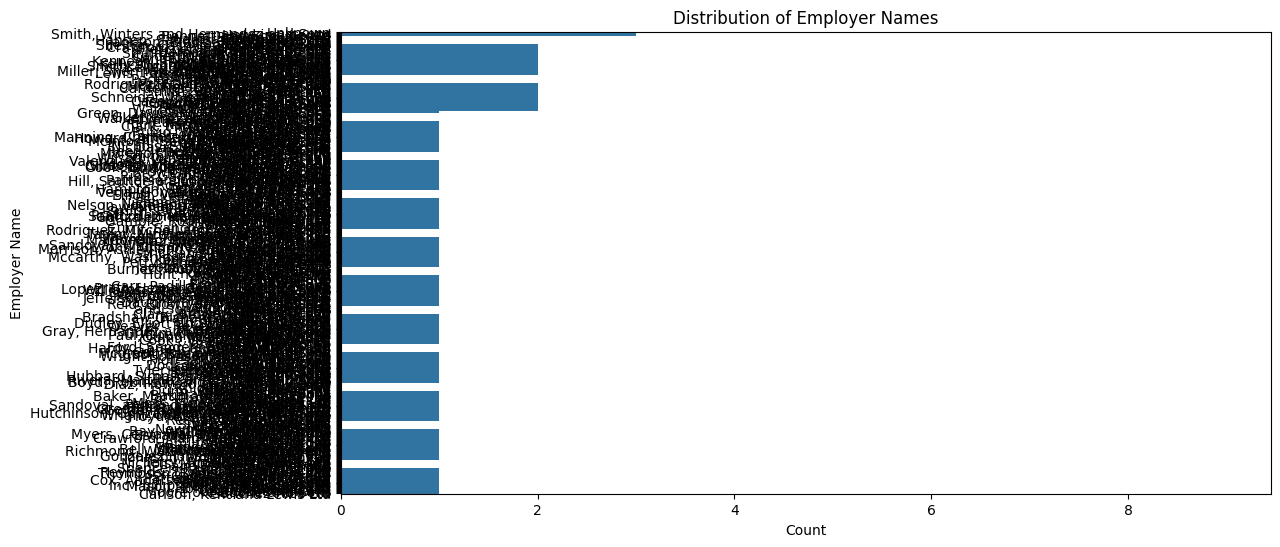

In [377]:
## plot for employerName
plt.figure(figsize=(12, 6))
sns.countplot(y='employerName', data=cleaned_extracted_entities_df, order=cleaned_extracted_entities_df['employerName'].value_counts().index)
plt.title('Distribution of Employer Names')
plt.xlabel('Count')
plt.ylabel('Employer Name')
plt.show()

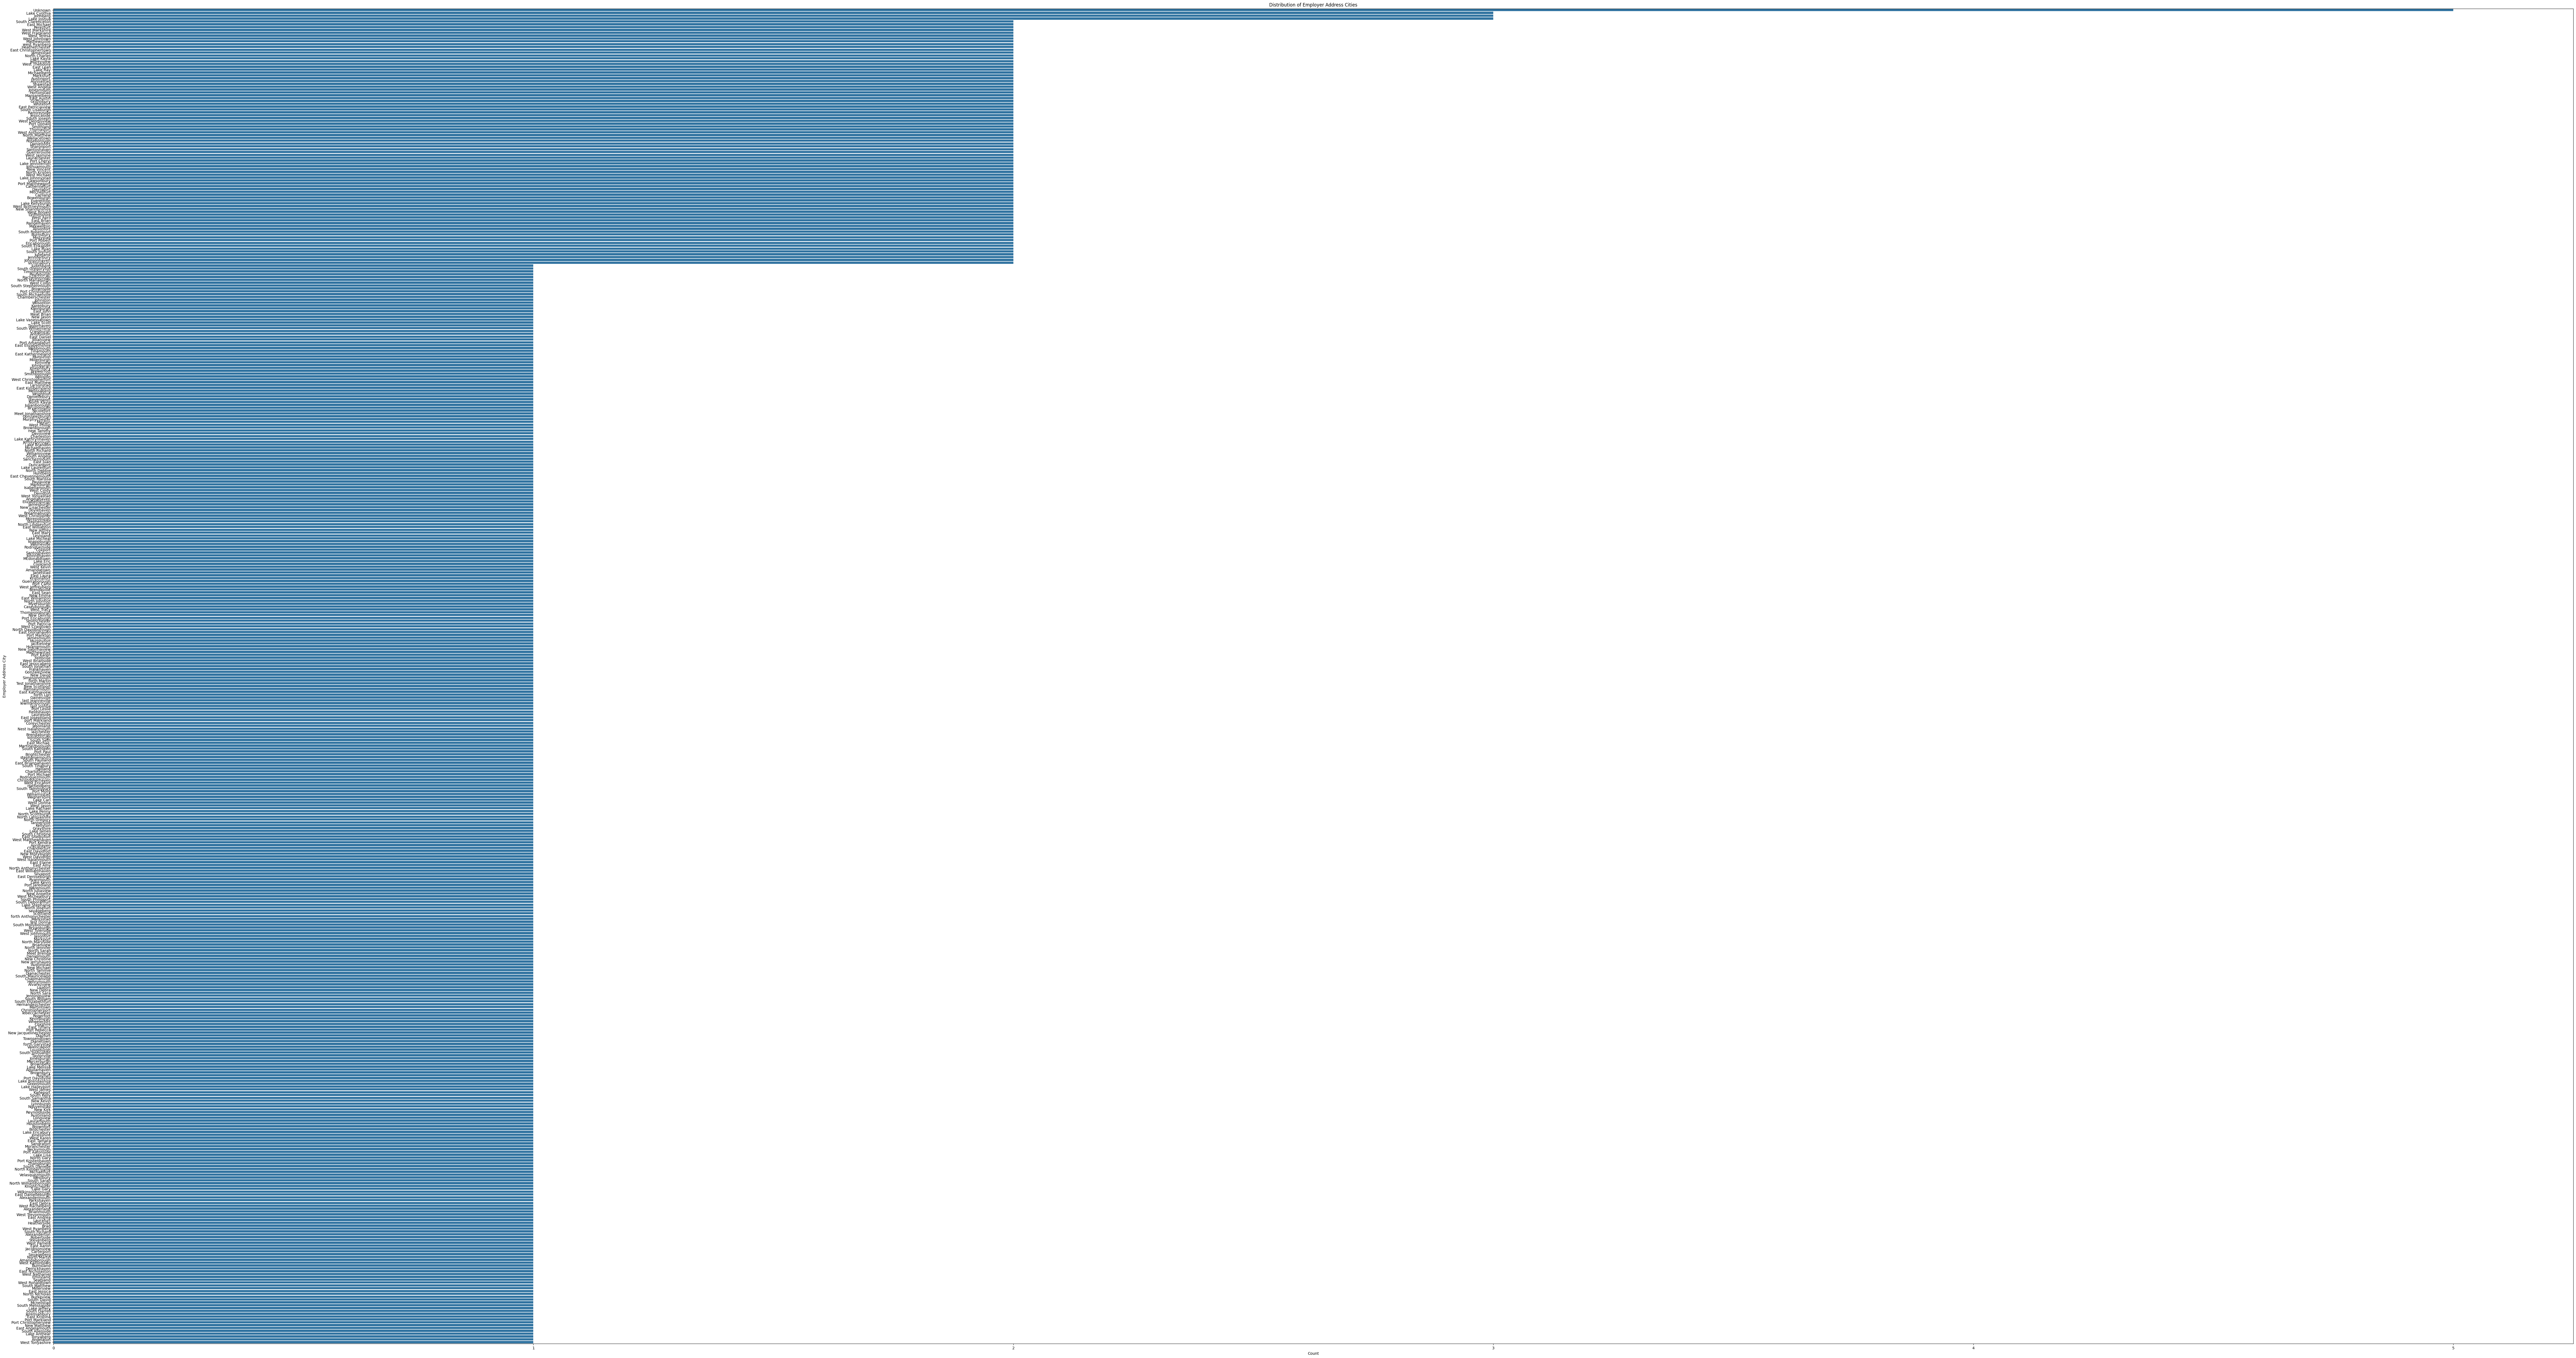

In [379]:
## plot for employerAddressCity
plt.figure(figsize=(120, 64))
sns.countplot(y='employerAddressCity', data=cleaned_extracted_entities_df, order=cleaned_extracted_entities_df['employerAddressCity'].value_counts().index)
plt.title('Distribution of Employer Address Cities')
plt.xlabel('Count')
plt.ylabel('Employer Address City')
plt.show()

In [384]:
# Install the spaCy model if not already installed
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [392]:
##  train the model on train dataset
import spacy
from spacy.training import Example
from spacy.lang.en import English
from spacy.util import minibatch, compounding
from spacy.training import Example
import random

# Load main extraction files
cleaned_data_path = 'cleaned_extracted_entities_train.csv'
cleaned_extracted_entities_df = pd.read_csv(cleaned_data_path)

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


In [393]:
## train the model
# Define the training data
training_data = []

# Iterate over the rows of the cleaned extracted entities DataFrame
for _, row in cleaned_extracted_entities_df.iterrows():
    # Create a new example
    example = Example.from_dict(nlp.make_doc(row['employerName']), {"entities": [(0, len(row['employerName']), 'employerName')]})
    # Append the example to the training data
    training_data.append(example)

# Define the number of training iterations
n_iter = 10

# Get the ner component
ner = nlp.get_pipe('ner')

# Add the label to the ner
ner.add_label('employerName')

# Disable other pipes
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

# Train the model
with nlp.disable_pipes(*other_pipes):
    for _ in range(n_iter):
        random.shuffle(training_data)
        losses = {}
        batches = minibatch(training_data, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            nlp.update(batch, losses=losses)
        print(losses)


{'ner': np.float32(488.95386)}
{'ner': np.float32(7.2417784)}
{'ner': np.float32(0.4598755)}
{'ner': np.float32(0.09503386)}
{'ner': np.float32(3.3860695e-06)}
{'ner': np.float32(9.635226e-07)}
{'ner': np.float32(7.18183e-06)}
{'ner': np.float32(4.153335e-07)}
{'ner': np.float32(9.022523e-08)}
{'ner': np.float32(2.0975223e-07)}


In [395]:
## save the model
# Save the trained model
output_dir = 'trained_model'
nlp.to_disk(output_dir)

In [398]:
# Load the trained NER model
nlp = spacy.load('trained_model')

# Define the path to the validation dataset
val_dataset_path = '/home/killdollar/data_task/dataset/dataset/val/boxes_transcripts/'

# Function to read the content of a TSV file
def read_tsv(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# List all files in the validation dataset directory
val_files = os.listdir(val_dataset_path)
# Predict entities and store results in a DataFrame
predictions = []

for file_name in val_files:
    file_path = os.path.join(val_dataset_path, file_name)
    text = read_tsv(file_path)
    doc = nlp(text)
    for ent in doc.ents:
        predictions.append({
            'file': file_name,
            'text': ent.text,
            'label': ent.label_
        })

# Create a DataFrame to display the predictions
predictions_df = pd.DataFrame(predictions)

# Display the DataFrame
print(predictions_df)

                                                    file  \
0      3935d578-9197-43f1-962e-f61973d69a17_document-...   
1      3935d578-9197-43f1-962e-f61973d69a17_document-...   
2      3935d578-9197-43f1-962e-f61973d69a17_document-...   
3      3935d578-9197-43f1-962e-f61973d69a17_document-...   
4      3935d578-9197-43f1-962e-f61973d69a17_document-...   
...                                                  ...   
25906  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25907  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25908  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25909  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25910  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   

                                                    text         label  
0      39,39,504,937,527,970,a\n41,50,536,938,672,973...  employerName  
1      68,73,851,936,936,973,number\n128,132,1582,940...  employerName  
2                 ,"\n134,142,1660,940,1803,976,Accurate  em

In [399]:
predictions_df.head()

,file,text,label
0,3935d578-9197-43f1-962e-f61973d69a17_document-...,"39,39,504,937,527,970,a\n41,50,536,938,672,973...",employerName
1,3935d578-9197-43f1-962e-f61973d69a17_document-...,"68,73,851,936,936,973,number\n128,132,1582,940...",employerName
2,3935d578-9197-43f1-962e-f61973d69a17_document-...,",""\n134,142,1660,940,1803,976,Accurate",employerName
3,3935d578-9197-43f1-962e-f61973d69a17_document-...,.\n,employerName
4,3935d578-9197-43f1-962e-f61973d69a17_document-...,"166,168,2202,938,2253,974,IRS\n170,176,2259,93...",employerName


In [400]:
## label unique values
predictions_df['label'].unique()

array(['employerName', 'CARDINAL', 'PERCENT', 'DATE', 'QUANTITY',
       'ORDINAL', 'PRODUCT', 'MONEY'], dtype=object)

In [408]:
## show me the rows with other label
predictions_df[predictions_df['label'] == 'DATE']['text']


508                     2433,2436,677,1485,742,1510,name\n
960                 13500,13503,1355,2567,1388,2598,3842\n
1137     10112,10117,755,2866,907,2907,108198\n10119,10...
3573                              36,40,290,36,329,53,comp
5478                    18817,18819,1064,2288,1087,2309,No
6890                     1844,1847,1390,2195,1468,2226,emp
7350                     1844,1847,1390,2195,1468,2226,emp
7411                      1643,1649,729,241,824,263,205649
8191                    2013,2014,1658,1346,1709,1384,94\n
9357                     1821,1824,1390,2195,1468,2226,emp
9835                    9804,9810,562,2076,626,2101,231071
9855     10884,10886,1222,2299,1248,2337,emp\n10888,108...
11302    15490,15495,2085,2780,2138,2807,Return\n15497,...
12591    10153,10158,137,2065,178,2095,social\n10160,10...
12736                    1812,1815,1390,2195,1468,2226,emp
12916                   11528,11533,961,662,1041,689,21211
12931                 12437,12440,387,1643,424,1664,(See

In [409]:
## single line
predictions_df[predictions_df['label'] == 'DATE']['text'].value_counts()

text
1844,1847,1390,2195,1468,2226,emp                                                                                                                     3
1821,1824,1390,2195,1468,2226,emp                                                                                                                     2
2433,2436,677,1485,742,1510,name\n                                                                                                                    1
10112,10117,755,2866,907,2907,108198\n10119,10119,914,2866,930,2905                                                                                   1
13500,13503,1355,2567,1388,2598,3842\n                                                                                                                1
18817,18819,1064,2288,1087,2309,No                                                                                                                    1
36,40,290,36,329,53,comp                                                           

In [410]:
## apply the prediction on val dataset
# Load the trained NER model
nlp = spacy.load('trained_model')

# Define the path to the validation dataset
val_dataset_path = '/home/killdollar/data_task/dataset/dataset/val/boxes_transcripts'

# Function to read the content of a TSV file
def read_tsv(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# List all files in the validation dataset directory
val_files = os.listdir(val_dataset_path)

# Predict entities and store results in a DataFrame
predictions = []

for file_name in val_files:
    file_path = os.path.join(val_dataset_path, file_name)
    text = read_tsv(file_path)
    doc = nlp(text)
    for ent in doc.ents:
        predictions.append({
            'file': file_name,
            'text': ent.text,
            'label': ent.label_
        })

# Create a DataFrame to display the predictions
predictions_df = pd.DataFrame(predictions)

# Display the DataFrame
print(predictions_df)

                                                    file  \
0      3935d578-9197-43f1-962e-f61973d69a17_document-...   
1      3935d578-9197-43f1-962e-f61973d69a17_document-...   
2      3935d578-9197-43f1-962e-f61973d69a17_document-...   
3      3935d578-9197-43f1-962e-f61973d69a17_document-...   
4      3935d578-9197-43f1-962e-f61973d69a17_document-...   
...                                                  ...   
25906  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25907  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25908  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25909  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   
25910  d564daf5-b196-4c13-af4c-e211d79f59af_document-...   

                                                    text         label  
0      39,39,504,937,527,970,a\n41,50,536,938,672,973...  employerName  
1      68,73,851,936,936,973,number\n128,132,1582,940...  employerName  
2                 ,"\n134,142,1660,940,1803,976,Accurate  em

- Make sure to add your model predictions in the last column of the tsv file for the val set (found in
the val directory) and run eval.py (against val_w_ann), this will generate the metrics.tsv file -
this contains a field-wise list of precision, recall and f1 score. Attach the metrics.tsv file and any
analysis you’ve done when making your submission.

In [415]:
import spacy
import pandas as pd
import os

# Load the trained NER model
nlp = spacy.load('trained_model')

# Define the path to the validation dataset
val_dataset_path = '/home/killdollar/data_task/dataset/dataset/val/boxes_transcripts'
val_w_ann_path = '/home/killdollar/data_task/dataset/dataset/val_w_ann/boxes_transcripts'

# Function to read the content of a TSV file
def read_tsv(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Function to write the content to a TSV file
def write_tsv(file_path, content):
    with open(file_path, 'w') as file:
        file.write(content)

# List all files in the validation dataset directory
val_files = os.listdir(val_dataset_path)

# Predict entities and store results in a DataFrame
for file_name in val_files:
    file_path = os.path.join(val_dataset_path, file_name)
    text = read_tsv(file_path)
    doc = nlp(text)
    
    # Read the original TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', header=None)
    
    # Debugging: Print the first few rows of the DataFrame to inspect its structure
    print(f"Processing file: {file_name}")
    print(df.head())
    
    # Ensure the first two columns are integers for comparison
    if df.shape[1] >= 2:
        df[0] = pd.to_numeric(df[0], errors='coerce').fillna(0).astype(int)
        df[1] = pd.to_numeric(df[1], errors='coerce').fillna(0).astype(int)
    else:
        print(f"Skipping file {file_name} due to unexpected structure.")
        continue
    
    # Add a new column for predictions
    df['predictions'] = ''
    for ent in doc.ents:
        start = ent.start_char
        end = ent.end_char
        label = ent.label_
        df.loc[(df[0] <= start) & (df[1] >= end), 'predictions'] = label
    
    # Write the updated DataFrame back to a TSV file
    output_file_path = os.path.join(val_w_ann_path, file_name)
    df.to_csv(output_file_path, sep='\t', index=False, header=False)



Processing file: 3935d578-9197-43f1-962e-f61973d69a17_document-3_page-1.tsv
                                  0
0           39,39,504,937,527,970,a
1  41,50,536,938,672,973,Employee's
2      52,57,677,941,746,973,social
3    59,66,751,940,845,973,security
4      68,73,851,936,936,973,number
Skipping file 3935d578-9197-43f1-962e-f61973d69a17_document-3_page-1.tsv due to unexpected structure.
Processing file: 5f95f0e4-c4ce-46e9-be96-fddd2520d170_document-7_page-1.tsv
                                0
0        24,27,786,27,895,73,2018
1         29,31,904,27,998,74,W-2
2       33,35,1007,27,1092,75,and
3  37,44,1104,27,1357,75,EARNINGS
4   46,52,1371,26,1616,74,SUMMARY
Skipping file 5f95f0e4-c4ce-46e9-be96-fddd2520d170_document-7_page-1.tsv due to unexpected structure.
Processing file: cd5acfb2-e55e-427c-a316-a86cfd72ea5b_document-4_page-1.tsv
                                  0
0           38,38,504,937,528,970,a
1  40,49,537,938,671,972,Employee's
2      51,56,676,941,747,973,social
3   

python: can't open file '/home/killdollar/data_task/eval.py': [Errno 2] No such file or directory


512

In [418]:
# Run the eval.py script
os.system('python /home/killdollar/data_task/dataset/eval.py')

Traceback (most recent call last):
  File "/home/killdollar/data_task/dataset/eval.py", line 161, in <module>
    get_dataset_labels(doc_true, doc_pred, save=False)
  File "/home/killdollar/data_task/dataset/eval.py", line 136, in get_dataset_labels
    for true_file in os.listdir(true_path):
FileNotFoundError: [Errno 2] No such file or directory: '/home/killdollar/data_task/train/boxes_transcripts_labels'


256